# 📊 Predicting Term Deposit Subscriptions from Telemarketing Data

**Dataset**: Portuguese Bank Marketing Dataset  
**Objective**: Use Exploratory Data Analysis (EDA) and classification models to uncover customer patterns and improve the efficiency of term deposit telemarketing campaigns.

---

**Author**: *Bibin Varghese*  
**Date**: *04/28/2025*

---

In [4]:
### Importing Libraries
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### i) Data Collection

In [6]:
### Loading the dataset
df0 = pd.read_csv("bank_marketing_data.csv")
df0.head()

UCI repo Unnamed: 1                    Unnamed: 2 Unnamed: 3  \
0     banking marketing        NaN                           NaN        NaN   
1  customer id and age.        NaN  Customer salary and balance.        NaN   
2            customerid        age                        salary    balance   
3                     1         58                        100000       2143   
4                     2         44                         60000         29   

                                          Unnamed: 4            Unnamed: 5  \
0                                                NaN                   NaN   
1  Customer marital status and job with education...                   NaN   
2                                            marital                jobedu   
3                                            married   management,tertiary   
4                                             single  technician,secondary   

                                   Unnamed: 6 Unnamed: 7  \
0                                         NaN        NaN   
1  particular customer before targeted or not        NaN   
2                                    targeted    default   
3                                         yes         no   
4                                         yes         no   

                           Unnamed: 8 Unnamed: 9   Unnamed: 10 Unnamed: 11  \
0                                 NaN        NaN           NaN         NaN   
1  Loan types: loans or housing loans        NaN  Contact type         NaN   
2                             housing       loan       contact         day   
3                                 yes         no       unknown           5   
4                                 yes         no       unknown           5   

        Unnamed: 12       Unnamed: 13 Unnamed: 14 Unnamed: 15 Unnamed: 16  \
0               NaN               NaN         NaN         NaN         NaN   
1  month of contact  duration of call         NaN         NaN         NaN   
2             month          duration    campaign       pdays    previous   
3         may, 2017           261 sec           1          -1           0   
4         may, 2017           151 sec           1          -1           0   

                   Unnamed: 17                              Unnamed: 18  
0                          NaN                                      NaN  
1  outcome of previous contact  response of customer after call happned  
2                     poutcome                                 response  
3                      unknown                                       no  
4                      unknown                                       no

In [7]:
##Checking the shape and info
print("Dataset Shape:", df0.shape)

Dataset Shape: (45214, 19)


In [8]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45214 entries, 0 to 45213
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   UCI repo     45214 non-null  object
 1   Unnamed: 1   45192 non-null  object
 2   Unnamed: 2   45213 non-null  object
 3   Unnamed: 3   45212 non-null  object
 4   Unnamed: 4   45213 non-null  object
 5   Unnamed: 5   45212 non-null  object
 6   Unnamed: 6   45213 non-null  object
 7   Unnamed: 7   45212 non-null  object
 8   Unnamed: 8   45213 non-null  object
 9   Unnamed: 9   45212 non-null  object
 10  Unnamed: 10  45213 non-null  object
 11  Unnamed: 11  45212 non-null  object
 12  Unnamed: 12  45163 non-null  object
 13  Unnamed: 13  45213 non-null  object
 14  Unnamed: 14  45212 non-null  object
 15  Unnamed: 15  45212 non-null  object
 16  Unnamed: 16  45212 non-null  object
 17  Unnamed: 17  45213 non-null  object
 18  Unnamed: 18  45183 non-null  object
dtypes: object(19)
memory usag

### ii) Data Cleaning

In [9]:
## Skipping the first three rows
### Metadata and redundant headers
df0 = pd.read_csv("bank_marketing_data.csv", skiprows = 3)
df0.head()

customerid   age  salary  balance  marital                  jobedu  \
0           1  58.0  100000     2143  married     management,tertiary   
1           2  44.0   60000       29   single    technician,secondary   
2           3  33.0  120000        2  married  entrepreneur,secondary   
3           4  47.0   20000     1506  married     blue-collar,unknown   
4           5  33.0       0        1   single         unknown,unknown   

  targeted default housing loan  contact  day      month duration  campaign  \
0      yes      no     yes   no  unknown    5  may, 2017  261 sec         1   
1      yes      no     yes   no  unknown    5  may, 2017  151 sec         1   
2      yes      no     yes  yes  unknown    5  may, 2017   76 sec         1   
3       no      no     yes   no  unknown    5  may, 2017   92 sec         1   
4       no      no      no   no  unknown    5  may, 2017  198 sec         1   

   pdays  previous poutcome response  
0     -1         0  unknown       no  
1     -1         0  unknown       no  
2     -1         0  unknown       no  
3     -1         0  unknown       no  
4     -1         0  unknown       no

In [10]:
df0.shape

(45211, 19)

There's a small chance that customerid could be useful later — for tracking predictions, joining datasets, or identifying individual customers for action — it’s smart to keep it.

Dataset now has 19 columns and 45,211 rows.

In [11]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [12]:
## Let's drop jobedu column into job and education
df0['job'] = df0.jobedu.apply(lambda x: x.split(',')[0])

In [13]:
df0.head()

customerid   age  salary  balance  marital                  jobedu  \
0           1  58.0  100000     2143  married     management,tertiary   
1           2  44.0   60000       29   single    technician,secondary   
2           3  33.0  120000        2  married  entrepreneur,secondary   
3           4  47.0   20000     1506  married     blue-collar,unknown   
4           5  33.0       0        1   single         unknown,unknown   

  targeted default housing loan  contact  day      month duration  campaign  \
0      yes      no     yes   no  unknown    5  may, 2017  261 sec         1   
1      yes      no     yes   no  unknown    5  may, 2017  151 sec         1   
2      yes      no     yes  yes  unknown    5  may, 2017   76 sec         1   
3       no      no     yes   no  unknown    5  may, 2017   92 sec         1   
4       no      no      no   no  unknown    5  may, 2017  198 sec         1   

   pdays  previous poutcome response           job  
0     -1         0  unknown       no    management  
1     -1         0  unknown       no    technician  
2     -1         0  unknown       no  entrepreneur  
3     -1         0  unknown       no   blue-collar  
4     -1         0  unknown       no       unknown

In [14]:
df0['education'] = df0.jobedu.apply(lambda x: x.split(',')[1])

In [15]:
df0.head()

customerid   age  salary  balance  marital                  jobedu  \
0           1  58.0  100000     2143  married     management,tertiary   
1           2  44.0   60000       29   single    technician,secondary   
2           3  33.0  120000        2  married  entrepreneur,secondary   
3           4  47.0   20000     1506  married     blue-collar,unknown   
4           5  33.0       0        1   single         unknown,unknown   

  targeted default housing loan  ... day      month duration campaign  pdays  \
0      yes      no     yes   no  ...   5  may, 2017  261 sec        1     -1   
1      yes      no     yes   no  ...   5  may, 2017  151 sec        1     -1   
2      yes      no     yes  yes  ...   5  may, 2017   76 sec        1     -1   
3       no      no     yes   no  ...   5  may, 2017   92 sec        1     -1   
4       no      no      no   no  ...   5  may, 2017  198 sec        1     -1   

   previous  poutcome response           job  education  
0         0   unknown       no    management   tertiary  
1         0   unknown       no    technician  secondary  
2         0   unknown       no  entrepreneur  secondary  
3         0   unknown       no   blue-collar    unknown  
4         0   unknown       no       unknown    unknown  

[5 rows x 21 columns]

In [16]:
## Now, let's drop the jobedu column
df0.drop('jobedu', axis=1, inplace=True)

In [17]:
df0.reindex()
df0.head()

customerid   age  salary  balance  marital targeted default housing loan  \
0           1  58.0  100000     2143  married      yes      no     yes   no   
1           2  44.0   60000       29   single      yes      no     yes   no   
2           3  33.0  120000        2  married      yes      no     yes  yes   
3           4  47.0   20000     1506  married       no      no     yes   no   
4           5  33.0       0        1   single       no      no      no   no   

   contact  day      month duration  campaign  pdays  previous poutcome  \
0  unknown    5  may, 2017  261 sec         1     -1         0  unknown   
1  unknown    5  may, 2017  151 sec         1     -1         0  unknown   
2  unknown    5  may, 2017   76 sec         1     -1         0  unknown   
3  unknown    5  may, 2017   92 sec         1     -1         0  unknown   
4  unknown    5  may, 2017  198 sec         1     -1         0  unknown   

  response           job  education  
0       no    management   tertiary  
1       no    technician  secondary  
2       no  entrepreneur  secondary  
3       no   blue-collar    unknown  
4       no       unknown    unknown

In [18]:
cols = df0.columns.tolist()
cols

['customerid',
 'age',
 'salary',
 'balance',
 'marital',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response',
 'job',
 'education']

In [19]:
cols.remove('job')
cols.remove('education')

In [20]:
cols.insert(5,'job')
cols.insert(6,'education')

In [21]:
cols

['customerid',
 'age',
 'salary',
 'balance',
 'marital',
 'job',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

In [22]:
df0 = df0[cols]
df0.head()

customerid   age  salary  balance  marital           job  education  \
0           1  58.0  100000     2143  married    management   tertiary   
1           2  44.0   60000       29   single    technician  secondary   
2           3  33.0  120000        2  married  entrepreneur  secondary   
3           4  47.0   20000     1506  married   blue-collar    unknown   
4           5  33.0       0        1   single       unknown    unknown   

  targeted default housing loan  contact  day      month duration  campaign  \
0      yes      no     yes   no  unknown    5  may, 2017  261 sec         1   
1      yes      no     yes   no  unknown    5  may, 2017  151 sec         1   
2      yes      no     yes  yes  unknown    5  may, 2017   76 sec         1   
3       no      no     yes   no  unknown    5  may, 2017   92 sec         1   
4       no      no      no   no  unknown    5  may, 2017  198 sec         1   

   pdays  previous poutcome response  
0     -1         0  unknown       no  
1     -1         0  unknown       no  
2     -1         0  unknown       no  
3     -1         0  unknown       no  
4     -1         0  unknown       no

df0.shape

In [23]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   job         45211 non-null  object 
 6   education   45211 non-null  object 
 7   targeted    45211 non-null  object 
 8   default     45211 non-null  object 
 9   housing     45211 non-null  object 
 10  loan        45211 non-null  object 
 11  contact     45211 non-null  object 
 12  day         45211 non-null  int64  
 13  month       45161 non-null  object 
 14  duration    45211 non-null  object 
 15  campaign    45211 non-null  int64  
 16  pdays       45211 non-null  int64  
 17  previous    45211 non-null  int64  
 18  poutcome    45211 non-null  object 
 19  response    45181 non-nul

#### Checking for missing values

In [24]:
## Let's check for missing values
df0.isnull().sum().sort_values(ascending = False)

month         50
response      30
age           20
poutcome       0
previous       0
pdays          0
campaign       0
duration       0
day            0
contact        0
customerid     0
housing        0
default        0
targeted       0
education      0
job            0
marital        0
balance        0
salary         0
loan           0
dtype: int64

In [25]:
# Total number of rows
total_rows = len(df0)

# Missing value count and percentage
missing_percent = (df0.isnull().sum() / total_rows) * 100

missing_summary = pd.DataFrame({
    'Missing Count': df0.isnull().sum(),
    'Missing %': missing_percent.round(2)
})

# Show only columns with missing data
missing_summary[missing_summary['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)

Missing Count  Missing %
month                50       0.11
response             30       0.07
age                  20       0.04

In [26]:
df0.shape

(45211, 20)

#### Imputing the month column

I will be planning to use one-hot encoding. Using 'mode' imputation

In [27]:
most_frequent_month = df0['month'].mode()[0]
most_frequent_month

'may, 2017'

In [28]:
df0['month'] = df0['month'].fillna(most_frequent_month)

In [29]:
df0['month'].isnull().sum() 

0

In [30]:
df0.isnull().sum().sort_values(ascending = False)

response      30
age           20
poutcome       0
previous       0
pdays          0
campaign       0
duration       0
month          0
day            0
contact        0
customerid     0
housing        0
default        0
targeted       0
education      0
job            0
marital        0
balance        0
salary         0
loan           0
dtype: int64

In [31]:
df0['month'].value_counts()

month
may, 2017    13797
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: count, dtype: int64

- May 2017 was the most active marketing month — a lot of people were contacted then.
- March, September, December 2017 were much quieter.

In [32]:
df0['month'].value_counts(normalize = True)

month
may, 2017    0.305169
jul, 2017    0.152352
aug, 2017    0.138020
jun, 2017    0.118002
nov, 2017    0.087766
apr, 2017    0.064829
feb, 2017    0.058526
jan, 2017    0.031010
oct, 2017    0.016323
sep, 2017    0.012740
mar, 2017    0.010528
dec, 2017    0.004733
Name: proportion, dtype: float64

#### Imputing missing values in Age

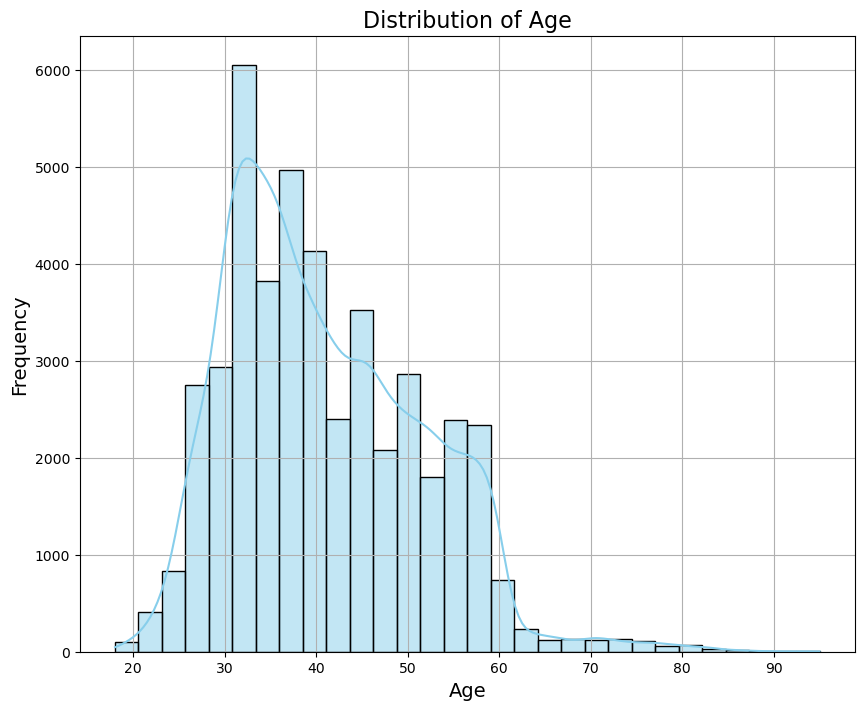

In [33]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.histplot(df0['age'], bins = 30, kde = True, color = 'skyblue')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.grid(True)
plt.show()

- The distribution is concentrated around 30–40 years
- There are fewer older customers (ages 60+ taper off gradually)
- A small tail goes up to age 90+
- Most frequent ages are between 30–35 — peak is at ~32
- Very few extreme values, but some customers are aged 80+, which is reasonable but rare

In [34]:
df0['age'].value_counts()

age
32.0    2085
31.0    1994
33.0    1972
34.0    1929
35.0    1892
        ... 
93.0       2
90.0       2
95.0       2
88.0       2
94.0       1
Name: count, Length: 77, dtype: int64

##### Median is ideal — it will place missing values around the central tendency without being distorted by the tail. It is simple, fast, and effective.
- KNN imputation and Predictive Modeling imputation might overkill here. The percentage of missing values is less.

In [35]:
df0[df0['age'].isnull()]

customerid  age  salary  balance   marital            job  education  \
161           162  NaN   60000       47    single     technician   tertiary   
1021         1022  NaN   60000     -500   married     technician  secondary   
1585         1586  NaN  100000      123  divorced     management  secondary   
3943         3944  NaN   70000       62   married       services   tertiary   
5675         5676  NaN   20000      -85   married    blue-collar    primary   
6873         6874  NaN   70000     1336  divorced       services  secondary   
9692         9693  NaN   50000     -162    single         admin.   tertiary   
11653       11654  NaN    8000     2562    single     unemployed    primary   
13417       13418  NaN   20000      452  divorced    blue-collar    primary   
14541       14542  NaN   20000      -84   married    blue-collar  secondary   
17159       17160  NaN  120000    -2082   married   entrepreneur  secondary   
19457       19458  NaN   60000     1055   married     technician  secondary   
23483       23484  NaN  120000      456   married   entrepreneur  secondary   
23939       23940  NaN   20000       85   married    blue-collar    primary   
26531       26532  NaN   60000     8112  divorced  self-employed  secondary   
35920       35921  NaN   20000        1  divorced    blue-collar    primary   
40757       40758  NaN   55000     3444  divorced        retired   tertiary   
40994       40995  NaN  100000     3371    single     management   tertiary   
43573       43574  NaN   16000      962   married      housemaid  secondary   
44974       44975  NaN  100000      839   married     management   tertiary   

      targeted default housing loan   contact  day      month  \
161         no      no     yes   no   unknown    5  may, 2017   
1021       yes      no     yes   no   unknown    7  may, 2017   
1585       yes      no      no   no   unknown    8  may, 2017   
3943       yes      no     yes  yes   unknown   16  may, 2017   
5675       yes      no     yes  yes   unknown   26  may, 2017   
6873       yes      no     yes   no   unknown   28  may, 2017   
9692        no      no     yes  yes   unknown    6  jun, 2017   
11653      yes      no      no   no   unknown   20  jun, 2017   
13417      yes      no     yes   no  cellular    9  jul, 2017   
14541      yes      no      no  yes  cellular   15  jul, 2017   
17159      yes     yes      no  yes  cellular   28  jul, 2017   
19457      yes      no     yes   no  cellular    7  aug, 2017   
23483      yes      no     yes  yes  cellular   28  aug, 2017   
23939      yes      no      no   no  cellular   29  aug, 2017   
26531      yes      no     yes  yes  cellular   20  nov, 2017   
35920      yes      no     yes   no  cellular    8  may, 2017   
40757       no      no      no   no  cellular   10  aug, 2017   
40994       no      no     yes  yes  cellular   13  aug, 2017   
43573      yes      no     yes   no  cellular   28  apr, 2017   
44974      yes      no      no  yes  cellular   11  oct, 2017   

                   duration  campaign  pdays  previous poutcome response  
161                 181 sec         1     -1         0  unknown       no  
1021                 78 sec         5     -1         0  unknown       no  
1585                306 sec         2     -1         0  unknown       no  
3943                280 sec         2     -1         0  unknown       no  
5675                118 sec         1     -1         0  unknown       no  
6873                298 sec         5     -1         0  unknown       no  
9692                119 sec         1     -1         0  unknown       no  
11653               489 sec         2     -1         0  unknown       no  
13417                96 sec         1     -1         0  unknown       no  
14541              1.25 min         4     -1         0  unknown       no  
17159              2.05 min         6     -1         0  unknown       no  
19457              4.35 min         2     -1         0  unknown       no  
23483 

In [36]:
df0['age'].median()

39.0

In [37]:
#  Let’s Impute Using Median
df0['age'] = df0['age'].fillna(df0['age'].median()).astype(int)

In [38]:
df0.isnull().sum().sort_values(ascending = False)

response      30
age            0
poutcome       0
previous       0
pdays          0
campaign       0
duration       0
month          0
day            0
contact        0
customerid     0
housing        0
default        0
targeted       0
education      0
job            0
marital        0
balance        0
salary         0
loan           0
dtype: int64

In [39]:
df0.head()

customerid  age  salary  balance  marital           job  education  \
0           1   58  100000     2143  married    management   tertiary   
1           2   44   60000       29   single    technician  secondary   
2           3   33  120000        2  married  entrepreneur  secondary   
3           4   47   20000     1506  married   blue-collar    unknown   
4           5   33       0        1   single       unknown    unknown   

  targeted default housing loan  contact  day      month duration  campaign  \
0      yes      no     yes   no  unknown    5  may, 2017  261 sec         1   
1      yes      no     yes   no  unknown    5  may, 2017  151 sec         1   
2      yes      no     yes  yes  unknown    5  may, 2017   76 sec         1   
3       no      no     yes   no  unknown    5  may, 2017   92 sec         1   
4       no      no      no   no  unknown    5  may, 2017  198 sec         1   

   pdays  previous poutcome response  
0     -1         0  unknown       no  
1     -1         0  unknown       no  
2     -1         0  unknown       no  
3     -1         0  unknown       no  
4     -1         0  unknown       no

##### pdays
- pdays: Number of days since the client was last contacted in a previous campaign.

In [40]:
df0['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

- Most values are -1, meaning most customers were never contacted before.
- Only a small minority were actually contacted previously.
- Hence, the pdays column is heavily skewed with a dominant -1 value.

In [41]:
## Let's create a binary feature
df0['was_contacted_before'] = df0['pdays'].apply(lambda x: 0 if x == -1 else 1)

In [42]:
df0.head()

customerid  age  salary  balance  marital           job  education  \
0           1   58  100000     2143  married    management   tertiary   
1           2   44   60000       29   single    technician  secondary   
2           3   33  120000        2  married  entrepreneur  secondary   
3           4   47   20000     1506  married   blue-collar    unknown   
4           5   33       0        1   single       unknown    unknown   

  targeted default housing  ...  contact day      month duration campaign  \
0      yes      no     yes  ...  unknown   5  may, 2017  261 sec        1   
1      yes      no     yes  ...  unknown   5  may, 2017  151 sec        1   
2      yes      no     yes  ...  unknown   5  may, 2017   76 sec        1   
3       no      no     yes  ...  unknown   5  may, 2017   92 sec        1   
4       no      no      no  ...  unknown   5  may, 2017  198 sec        1   

   pdays  previous  poutcome response was_contacted_before  
0     -1         0   unknown       no                    0  
1     -1         0   unknown       no                    0  
2     -1         0   unknown       no                    0  
3     -1         0   unknown       no                    0  
4     -1         0   unknown       no                    0  

[5 rows x 21 columns]

##### Only customers who were contacted before

In [43]:
## Let's replace -1 with nan or else it will confuse model at later stages
df0.loc[df0.pdays < 0, "pdays"] = np.NaN
df0.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [44]:
# Dropping missing values from response variable, you cannot study or predict if the customer's response is missing
df0 = df0[df0['response'].notnull()]

In [45]:
df0.isnull().sum()

customerid                  0
age                         0
salary                      0
balance                     0
marital                     0
job                         0
education                   0
targeted                    0
default                     0
housing                     0
loan                        0
contact                     0
day                         0
month                       0
duration                    0
campaign                    0
pdays                   36930
previous                    0
poutcome                    0
response                    0
was_contacted_before        0
dtype: int64

In [46]:
df0['previous'].value_counts()

previous
0      36930
1       2771
2       2103
3       1142
4        713
5        458
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64

#### Check Categorical Variables Unique Values

In [47]:
### Let's quickly check columns before moving ahed for EDA
cat_cols = ['marital', 'job', 'education', 'targeted', 'default', 
            'housing', 'loan', 'contact', 'month', 'poutcome', 'response']

for col in cat_cols:
    print(f"\n{col} value counts:")
    print(df0[col].value_counts())


marital value counts:
marital
married     27195
single      12782
divorced     5204
Name: count, dtype: int64

job value counts:
job
blue-collar      9727
management       9454
technician       7592
admin.           5166
services         4150
retired          2263
self-employed    1575
entrepreneur     1486
unemployed       1303
housemaid        1239
student           938
unknown           288
Name: count, dtype: int64

education value counts:
education
secondary    23189
tertiary     13292
primary       6844
unknown       1856
Name: count, dtype: int64

targeted value counts:
targeted
yes    37067
no      8114
Name: count, dtype: int64

default value counts:
default
no     44366
yes      815
Name: count, dtype: int64

housing value counts:
housing
yes    25112
no     20069
Name: count, dtype: int64

loan value counts:
loan
no     37943
yes     7238
Name: count, dtype: int64

contact value counts:
contact
cellular     29267
unknown      13010
telephone     2904
Name: count, dtype: int

**Feature	Observations**
- marital: Majority married (60%), followed by single (28%), divorced (12%).
- job: Largest job groups: blue-collar, management, technician. Small percentage of unknown (288).
- education: Mostly secondary education (51%), then tertiary (29%). 4% unknown.
- targeted: 82% were targeted customers — marketing focused mostly on preselected people.
- default: Very few people had a credit default (yes: only ~1.8%).
- housing: 55% have a housing loan (yes). Good to check relation with subscription.
- loan: 16% have a personal loan (yes). Again interesting for modeling.
- contact: 65% contacted via cellular, 28% unknown (meaning no reliable contact information).
- month: Most contacts during May (30%), followed by July (15%), August (14%).
- poutcome:	82% unknown (never participated before), 11% failure, 4% success. So past campaign success is rare but valuable.
- response: Imbalanced dataset — ~12% said "yes", ~88% said "no". (Important for model balancing later.)

#### Check Numerical Variables Distributions

In [48]:
num_cols = ['age', 'salary', 'balance', 'duration', 'campaign', 'pdays', 'previous']

df0[num_cols].describe().T

count          mean           std     min      25%      50%  \
age       45181.0     40.934906     10.616517    18.0     33.0     39.0   
salary    45181.0  57005.046369  32089.163369     0.0  20000.0  60000.0   
balance   45181.0   1362.689936   3045.584521 -8019.0     72.0    448.0   
campaign  45181.0      2.763352      3.096578     1.0      1.0      2.0   
pdays      8251.0    224.596170    115.352191     1.0    133.0    195.0   
previous  45181.0      0.580355      2.303987     0.0      0.0      0.0   

              75%       max  
age          48.0      95.0  
salary    70000.0  120000.0  
balance    1428.0  102127.0  
campaign      3.0      63.0  
pdays       327.0     871.0  
previous      0.0     275.0

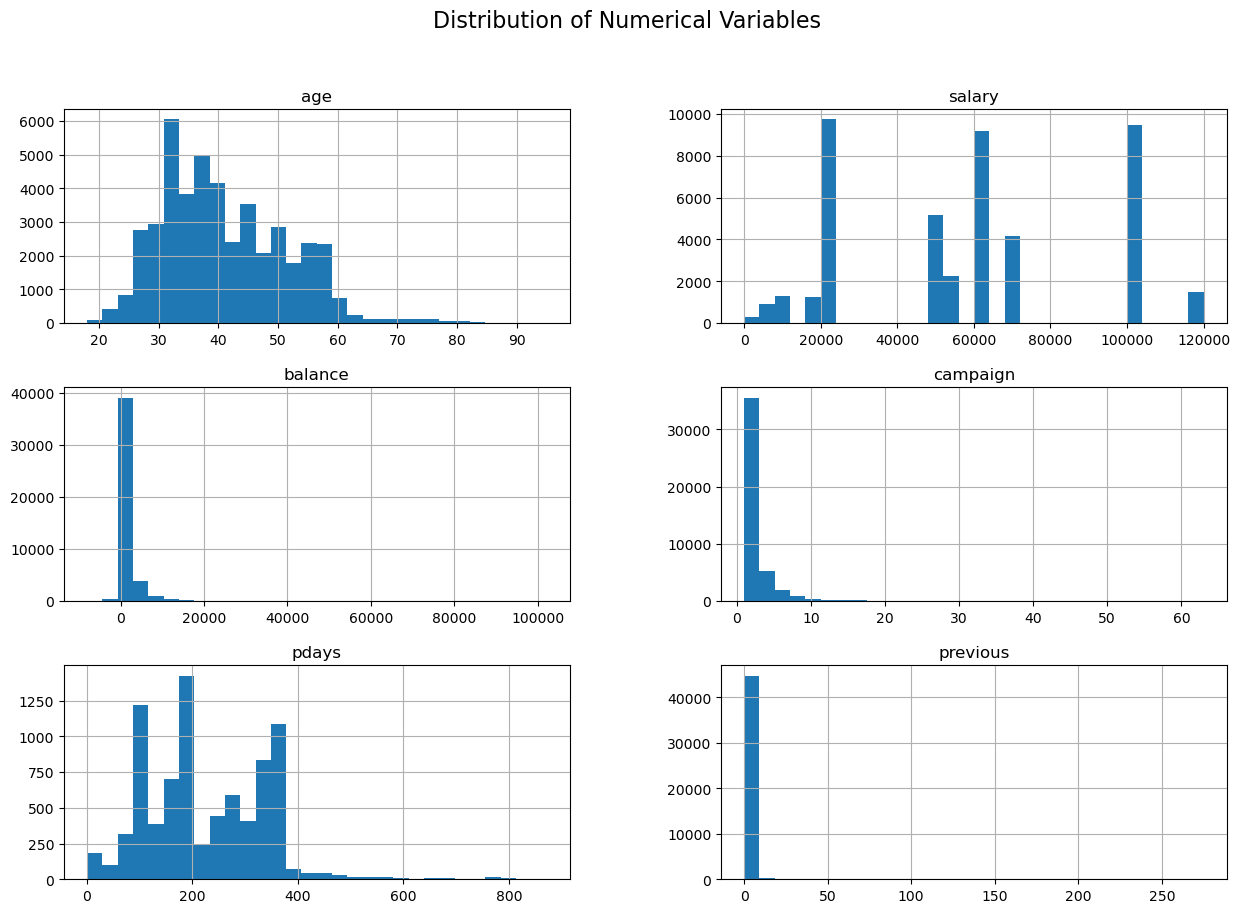

In [49]:
## Histogram for Numerical Variables
df0[num_cols].hist(figsize=(15,10), bins=30)
plt.suptitle('Distribution of Numerical Variables', fontsize=16)
plt.show()

**Feature	Observations**
- age: Mean ~41 years. Most customers between 30–48 years. Some up to 95 (rare). Slight right skew, but manageable.
- salary: Salary distribution is weird — multiple sharp peaks! Looks like salary bands (20k, 60k, 100k, etc.) — maybe system-generated salary groups, not continuous data.
- balance: Very right-skewed. Mean 1362, but huge max (102k). Median (448) much lower than mean. Some negative balances (debt?). Needs attention later.
- campaign: Very skewed. Median is 2 contacts, but maximum is 63 — a few customers were contacted many times.
- pdays: After cleaning, count dropped to 8251. Mean around 224 days. Heavy skew — a few contacted after a very long time (871 days!).
- previous: 58% have 0 previous contacts. Max = 275 (someone was contacted 275 times earlier! Extreme, maybe an outlier.)

### iii) Outlier Handling

In [50]:
df0.age.describe()

count    45181.000000
mean        40.934906
std         10.616517
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

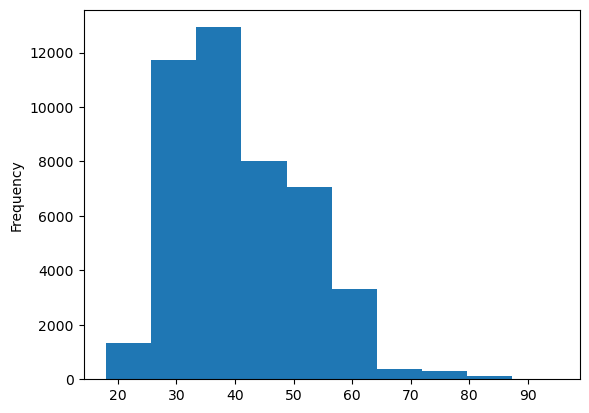

In [51]:
df0.age.plot.hist()
plt.show()

- Age is reasonably clean, and no outlier handling is needed.
- Most customers are in their early-to-mid working age
- Tapers off after 60
- Max around 90–95 is fine for banking	

In [52]:
print("Minimum Age:", df0['age'].min())
print("Maximum Age:", df0['age'].max())
print("Median Age:", df0['age'].median())
print("Mean Age:", df0['age'].mean())
print("Mode Age:", df0['age'].mode()[0])

Minimum Age: 18
Maximum Age: 95
Median Age: 39.0
Mean Age: 40.93490626590824
Mode Age: 32


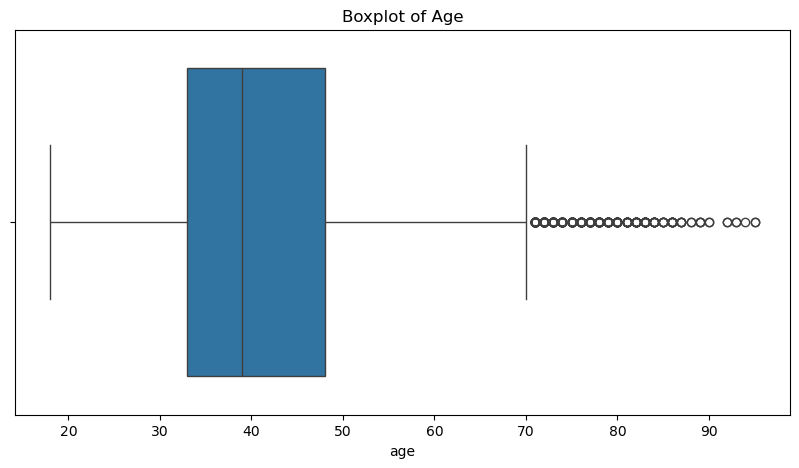

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df0['age'])
plt.title('Boxplot of Age')
plt.show()

In [54]:
#Let's create age band
# Define a function for age grouping
def age_group(age):
    if age <= 30:
        return '18-30'
    elif age <= 40:
        return '31-40'
    elif age <= 50:
        return '41-50'
    elif age <= 60:
        return '51-60'
    else:
        return '61+'

# Apply the function to create a new column
df0['age_band'] = df0['age'].apply(age_group)

In [55]:
df0.head()

customerid  age  salary  balance  marital           job  education  \
0           1   58  100000     2143  married    management   tertiary   
1           2   44   60000       29   single    technician  secondary   
2           3   33  120000        2  married  entrepreneur  secondary   
3           4   47   20000     1506  married   blue-collar    unknown   
4           5   33       0        1   single       unknown    unknown   

  targeted default housing  ... day      month  duration campaign pdays  \
0      yes      no     yes  ...   5  may, 2017   261 sec        1   NaN   
1      yes      no     yes  ...   5  may, 2017   151 sec        1   NaN   
2      yes      no     yes  ...   5  may, 2017    76 sec        1   NaN   
3       no      no     yes  ...   5  may, 2017    92 sec        1   NaN   
4       no      no      no  ...   5  may, 2017   198 sec        1   NaN   

   previous  poutcome  response was_contacted_before age_band  
0         0   unknown        no                    0    51-60  
1         0   unknown        no                    0    41-50  
2         0   unknown        no                    0    31-40  
3         0   unknown        no                    0    41-50  
4         0   unknown        no                    0    31-40  

[5 rows x 22 columns]

In [56]:
df0['age_band'].value_counts(normalize = True)

age_band
31-40    0.391359
41-50    0.248578
51-60    0.178327
18-30    0.155486
61+      0.026250
Name: proportion, dtype: float64

- most customers are mid-young adults

#### Balance Variable

In [57]:
df0['balance'].describe()

count     45181.000000
mean       1362.689936
std        3045.584521
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

- Mean >> Median: Highly right-skewed distribution
- Some customers have negative balance (probably debt/loan accounts)
- A few customers have 100k+ in balance (very wealthy clients)

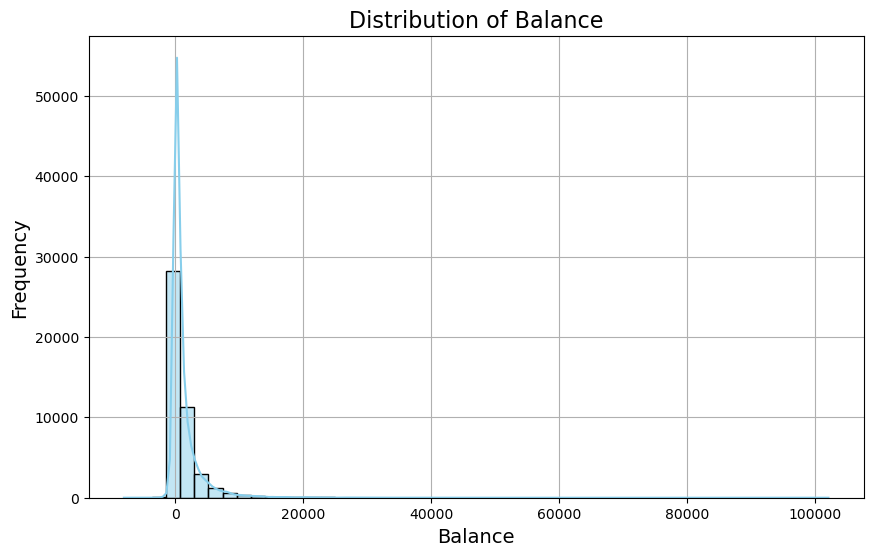

In [58]:
plt.figure(figsize=(10,6))
sns.histplot(df0['balance'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Balance', fontsize=16)
plt.xlabel('Balance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

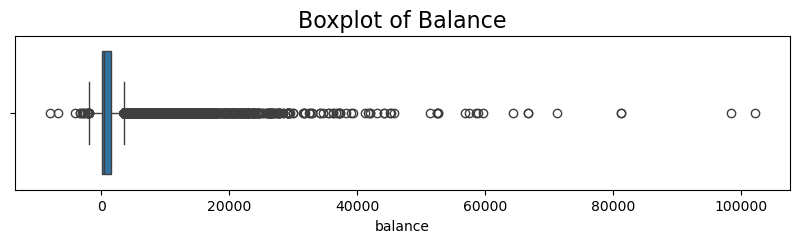

In [59]:
plt.figure(figsize=(10,2))
sns.boxplot(x=df0['balance'])
plt.title('Boxplot of Balance', fontsize=16)
plt.show()

In [60]:
## Let's check the balance values in each quantile
df0.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5769.0
0.99    13169.2
Name: balance, dtype: float64

- Only the top 1% have balances above 13k
-  Capping at 13,169 is perfect — safe, clean, and statistically correct!

In [61]:
df0[df0.balance > 15000].describe()

customerid         age         salary        balance         day  \
count    351.000000  351.000000     351.000000     351.000000  351.000000   
mean   25510.903134   45.341880   70008.547009   24295.780627   16.022792   
std    12274.354492   12.114333   34378.272805   12128.560693    8.101819   
min      335.000000   23.000000       0.000000   15030.000000    1.000000   
25%    17915.000000   35.000000   50000.000000   17074.000000    9.000000   
50%    26479.000000   44.000000   60000.000000   20723.000000   18.000000   
75%    35416.500000   55.000000  100000.000000   26254.000000   21.000000   
max    45128.000000   84.000000  120000.000000  102127.000000   31.000000   

         campaign       pdays    previous  was_contacted_before  
count  351.000000   62.000000  351.000000            351.000000  
mean     2.749288  188.516129    0.555556              0.176638  
std      3.036886  118.796388    1.784590              0.381907  
min      1.000000   31.000000    0.000000              0.000000  
25%      1.000000   96.250000    0.000000              0.000000  
50%      2.000000  167.500000    0.000000              0.000000  
75%      3.000000  246.500000    0.000000              0.000000  
max     31.000000  589.000000   23.000000              1.000000

- Only about 0.78% of total customers — very tiny fraction
- Mean balance is very high. 24,000+, confirming extremely wealthy customers
- Huge spread in balance (Std dev = 12,128)
- Max balance still 102,127 -> Confirms need to cap at 99th percentile

In [62]:
## Let's apply Winsorization or Capping
balance_cap = df0['balance'].quantile(0.99)
df0['balance'] = np.where(df0['balance'] > balance_cap, balance_cap, df0['balance'])

In [63]:
print("New maximum balance after capping:", df0['balance'].max())
print("New minimum balance after capping:", df0['balance'].min())

New maximum balance after capping: 13169.199999999939
New minimum balance after capping: -8019.0


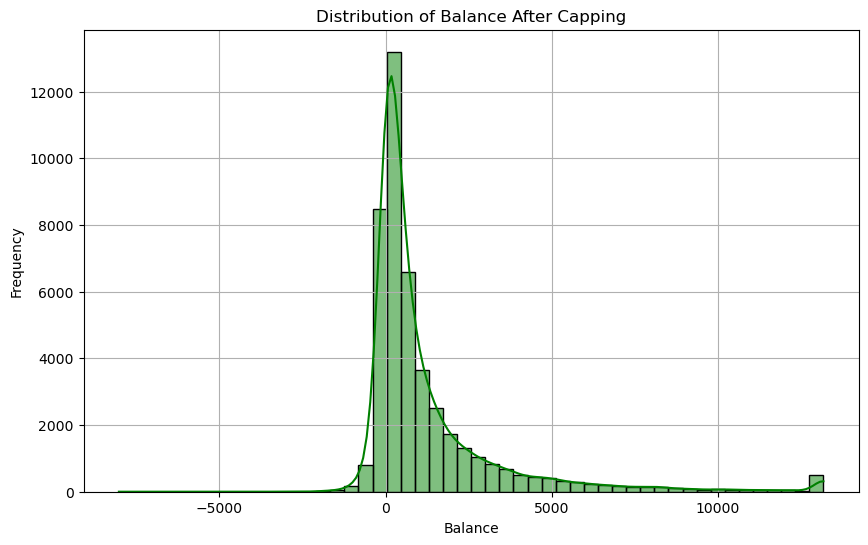

In [64]:
## Reploting Histogram
plt.figure(figsize=(10,6))
sns.histplot(df0['balance'], bins=50, kde=True, color='green')
plt.title('Distribution of Balance After Capping')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- The distribution is tighter now, still right-skewed but no crazy outliers.

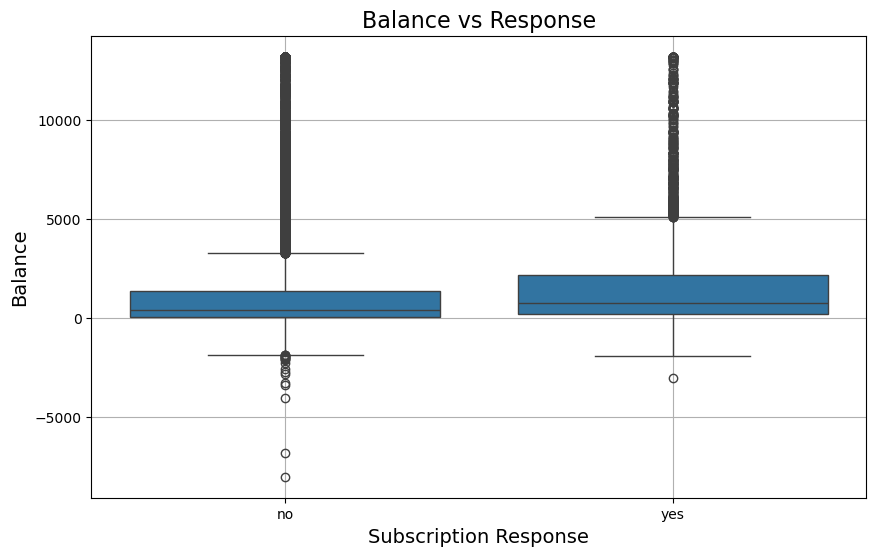

In [65]:
## Let's check if customers with higher balances are more likely to say "yes" to the term deposit offer.
plt.figure(figsize=(10,6))
sns.boxplot(x='response', y='balance', data=df0)
plt.title('Balance vs Response', fontsize=16)
plt.xlabel('Subscription Response', fontsize=14)
plt.ylabel('Balance', fontsize=14)
plt.grid(True)
plt.show()

Customers with higher account balances tend to have a higher likelihood of subscribing to term deposits. Median balances for subscribers are significantly higher compared to non-subscribers, suggesting that customers with greater financial capacity are more responsive to deposit offers.

In [66]:
df0.tail()

customerid  age  salary  balance   marital           job  education  \
45206       45207   51   60000    825.0   married    technician   tertiary   
45207       45208   71   55000   1729.0  divorced       retired    primary   
45208       45209   72   55000   5715.0   married       retired  secondary   
45209       45210   57   20000    668.0   married   blue-collar  secondary   
45210       45211   37  120000   2971.0   married  entrepreneur  secondary   

      targeted default housing  ... day      month              duration  \
45206      yes      no      no  ...  17  nov, 2017  16.2833333333333 min   
45207      yes      no      no  ...  17  nov, 2017               7.6 min   
45208      yes      no      no  ...  17  nov, 2017  18.7833333333333 min   
45209      yes      no      no  ...  17  nov, 2017  8.46666666666667 min   
45210      yes      no      no  ...  17  nov, 2017  6.01666666666667 min   

      campaign  pdays  previous  poutcome  response was_contacted_before  \
45206        3    NaN         0   unknown       yes                    0   
45207        2    NaN         0   unknown       yes                    0   
45208        5  184.0         3   success       yes                    1   
45209        4    NaN         0   unknown        no                    0   
45210        2  188.0        11     other        no                    1   

      age_band  
45206    51-60  
45207      61+  
45208      61+  
45209    51-60  
45210    31-40  

[5 rows x 22 columns]

In [67]:
df0.head()

customerid  age  salary  balance  marital           job  education  \
0           1   58  100000   2143.0  married    management   tertiary   
1           2   44   60000     29.0   single    technician  secondary   
2           3   33  120000      2.0  married  entrepreneur  secondary   
3           4   47   20000   1506.0  married   blue-collar    unknown   
4           5   33       0      1.0   single       unknown    unknown   

  targeted default housing  ... day      month  duration campaign pdays  \
0      yes      no     yes  ...   5  may, 2017   261 sec        1   NaN   
1      yes      no     yes  ...   5  may, 2017   151 sec        1   NaN   
2      yes      no     yes  ...   5  may, 2017    76 sec        1   NaN   
3       no      no     yes  ...   5  may, 2017    92 sec        1   NaN   
4       no      no      no  ...   5  may, 2017   198 sec        1   NaN   

   previous  poutcome  response was_contacted_before age_band  
0         0   unknown        no                    0    51-60  
1         0   unknown        no                    0    41-50  
2         0   unknown        no                    0    31-40  
3         0   unknown        no                    0    41-50  
4         0   unknown        no                    0    31-40  

[5 rows x 22 columns]

**Note that the units are inconsistent in the variable, 'duration'**

#### Duration

In [68]:
## Let's clean duration properly
# Create a function to convert everything to seconds
df0['duration_min'] = df0['duration'].apply(lambda x: float(x.split()[0]) / 60 if 'sec' in x else float(x.split()[0]))

In [69]:
df0[['duration', 'duration_min']].head()

duration  duration_min
0  261 sec      4.350000
1  151 sec      2.516667
2   76 sec      1.266667
3   92 sec      1.533333
4  198 sec      3.300000

In [70]:
df0[['duration', 'duration_min']].tail()

duration  duration_min
45206  16.2833333333333 min     16.283333
45207               7.6 min      7.600000
45208  18.7833333333333 min     18.783333
45209  8.46666666666667 min      8.466667
45210  6.01666666666667 min      6.016667

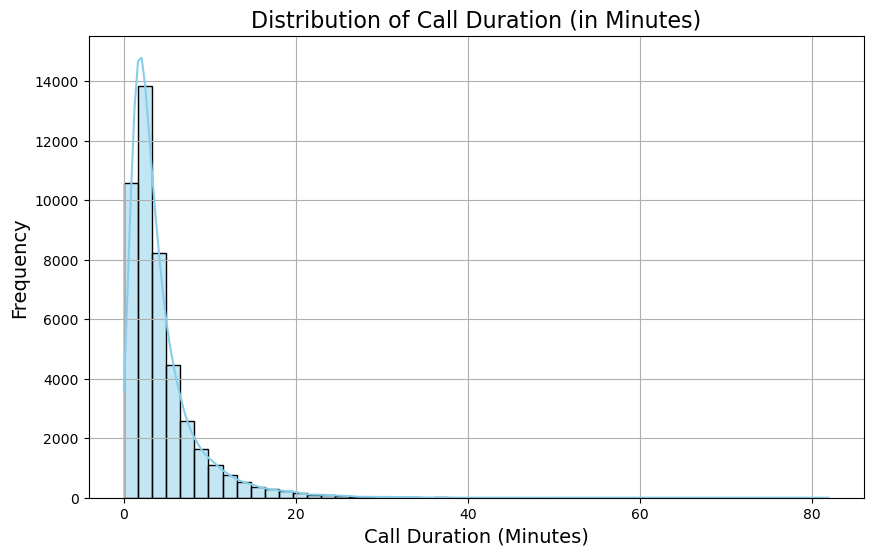

In [71]:
## Plot distribution
plt.figure(figsize=(10,6))
sns.histplot(df0['duration_min'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Call Duration (in Minutes)', fontsize=16)
plt.xlabel('Call Duration (Minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

The majority of telemarketing calls lasted less than 5 minutes, with a small fraction of calls extending beyond 10 minutes. Extremely long calls (>30 minutes) are rare but do exist.

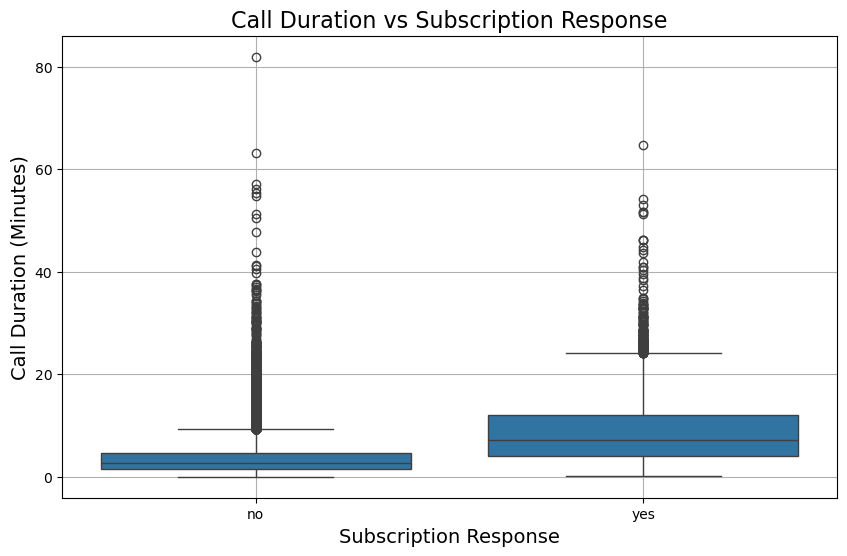

In [72]:
## Let's find out if customers with longer calls are more likely to say "yes".
plt.figure(figsize=(10,6))
sns.boxplot(x='response', y='duration_min', data=df0)
plt.title('Call Duration vs Subscription Response', fontsize=16)
plt.xlabel('Subscription Response', fontsize=14)
plt.ylabel('Call Duration (Minutes)', fontsize=14)
plt.grid(True)
plt.show()

- Customers who eventually subscribed had longer conversations
- Shorter calls → customers say "no" quickly	
- The more engaged a customer is, the more likely they are subscribing a term deposit

**Analysis of call durations reveals that customers who subscribed typically had longer calls compared to those who did not. Median call duration for positive responses is significantly higher (8–10 minutes) than for negative responses (2–3 minutes). This suggests that longer, engaging conversations during marketing calls are positively correlated with subscription success.**

In [73]:
cols

['customerid',
 'age',
 'salary',
 'balance',
 'marital',
 'job',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

In [74]:
df0.dtypes

customerid                int64
age                       int32
salary                    int64
balance                 float64
marital                  object
job                      object
education                object
targeted                 object
default                  object
housing                  object
loan                     object
contact                  object
day                       int64
month                    object
duration                 object
campaign                  int64
pdays                   float64
previous                  int64
poutcome                 object
response                 object
was_contacted_before      int64
age_band                 object
duration_min            float64
dtype: object

### iv) Univariate Analysis

#### Univariate Analysis - Marital

In [75]:
## Let's start with Univariate Analysis
df0.marital.value_counts()

marital
married     27195
single      12782
divorced     5204
Name: count, dtype: int64

In [76]:
df0.marital.value_counts(normalize = True)

marital
married     0.601912
single      0.282907
divorced    0.115181
Name: proportion, dtype: float64

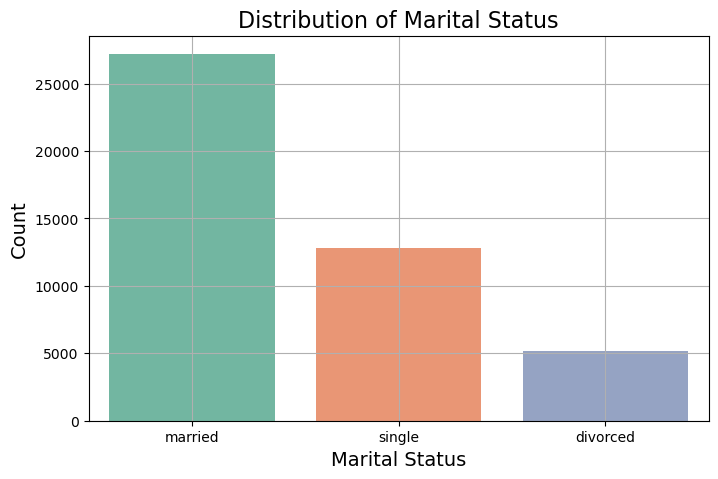

marital
married     60.191231
single      28.290653
divorced    11.518116
Name: proportion, dtype: float64


In [77]:
# Plot countplot
plt.figure(figsize=(8,5))
sns.countplot(x='marital', data=df0, order=df0['marital'].value_counts().index, palette='Set2')
plt.title('Distribution of Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()

# Print value counts as % also
marital_counts = df0['marital'].value_counts(normalize=True) * 100
print(marital_counts)

**Majority of the customers are married (around 60%), followed by singles and divorced. The dataset is moderately imbalanced across marital categories.**

Married customers form the largest segment (60%) in the dataset, followed by singles (28%) and divorced customers (12%). This distribution indicates that marital status could be a relevant feature when designing marketing strategies for term deposit promotions.

In [78]:
## Let's do a univariate analysis on the variable, job

#### Job

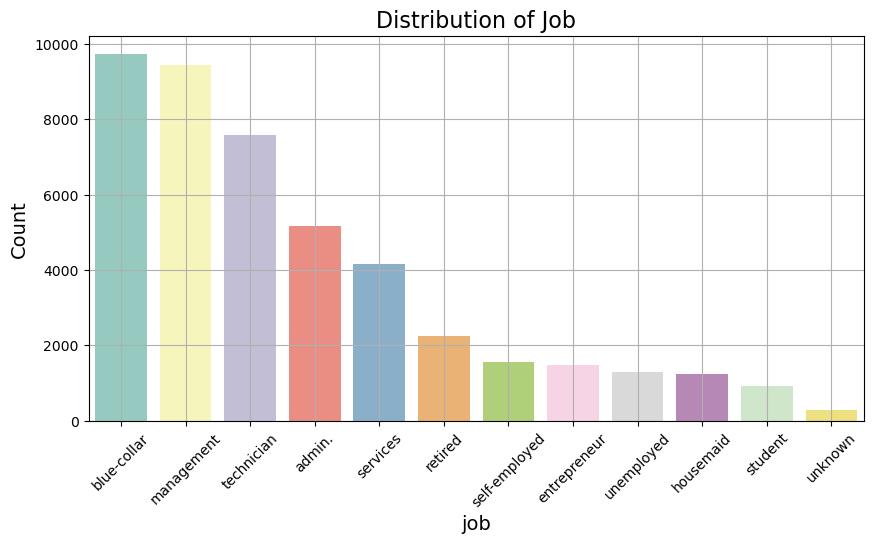

Distribution (%):
job
blue-collar      21.528961
management       20.924725
technician       16.803524
admin.           11.434010
services          9.185277
retired           5.008743
self-employed     3.485979
entrepreneur      3.288993
unemployed        2.883956
housemaid         2.742303
student           2.076094
unknown           0.637436
Name: proportion, dtype: float64


In [79]:
plt.figure(figsize=(10,5))
sns.countplot(
    x='job', 
    data=df0, 
    order=df0['job'].value_counts().index, 
    palette='Set3'
)
plt.title('Distribution of Job', fontsize=16)
plt.xlabel('job', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Value counts in %
print("Distribution (%):")
print(df0['job'].value_counts(normalize=True) * 100)

**The customer base is largely composed of blue-collar workers and management professionals, collectively accounting for over 40% of the population. Technicians and administrative staff also form significant segments. The dataset includes a broad spread across various professions, which may help capture diverse financial behaviors and responses to marketing campaigns. The minimal proportion of unknown job entries (0.64%) indicates strong data reliability for this feature.**

#### Education

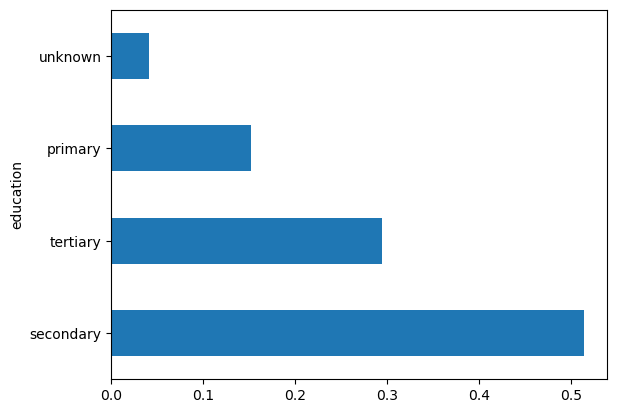

Distribution (%):
education
secondary    51.324672
tertiary     29.419446
primary      15.147960
unknown       4.107921
Name: proportion, dtype: float64


In [80]:
df0.education.value_counts(normalize=True).plot.barh()
plt.show()
print("Distribution (%):")
print(df0['education'].value_counts(normalize=True) * 100)

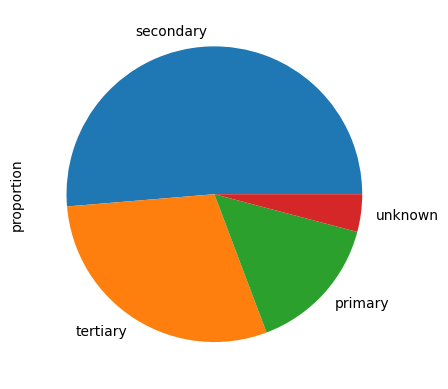

In [81]:
df0.education.value_counts(normalize=True).plot.pie()
plt.show()

**The dataset shows that over 80% of customers have at least secondary-level education, with nearly a third achieving tertiary education. Primary education customers form a smaller segment (15%). The low rate of unknown entries (4%) ensures that education can be reliably used in predictive models. Educational background may influence customers' financial decision-making and their likelihood of subscribing to term deposit products.**

In [82]:
df0.poutcome.value_counts()

poutcome
unknown    36935
failure     4897
other       1839
success     1510
Name: count, dtype: int64

#### poutcome

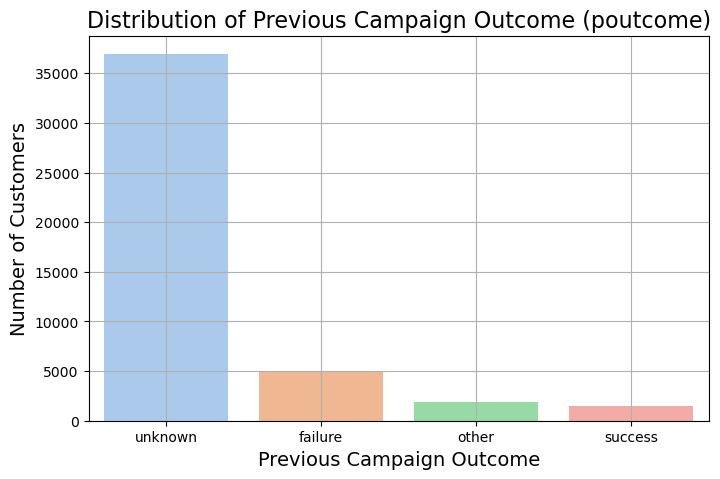

Distribution (%):
poutcome
unknown    81.748965
failure    10.838627
other       4.070295
success     3.342113
Name: proportion, dtype: float64


In [83]:
# 1. Plotting the distribution of poutcome from df0
plt.figure(figsize=(8,5))
sns.countplot(
    x='poutcome', 
    data=df0, 
    order=df0['poutcome'].value_counts().index, 
    palette='pastel'
)
plt.title('Distribution of Previous Campaign Outcome (poutcome)', fontsize=16)
plt.xlabel('Previous Campaign Outcome', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.grid(True)
plt.show()

# 2. Value counts as %
print("Distribution (%):")
print(df0['poutcome'].value_counts(normalize=True) * 100)

**A majority of the customers (82%) had no prior contact history (unknown). About 11% had experienced a failure in a previous campaign, while only around 3% had a successful past subscription. The small but notable 4% marked as other likely represent customers who showed interest but did not fully convert during prior campaigns. Past success and failure outcomes may serve as important predictors of current subscription likelihood.**

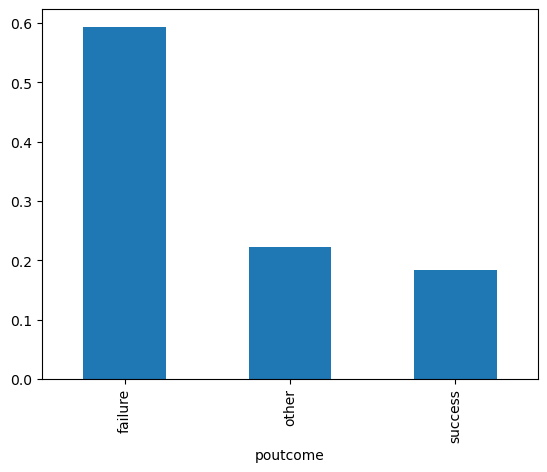

In [84]:
df0[~(df0.poutcome=='unknown')].poutcome.value_counts(normalize=True).plot.bar()
plt.show()

### Response Distribution

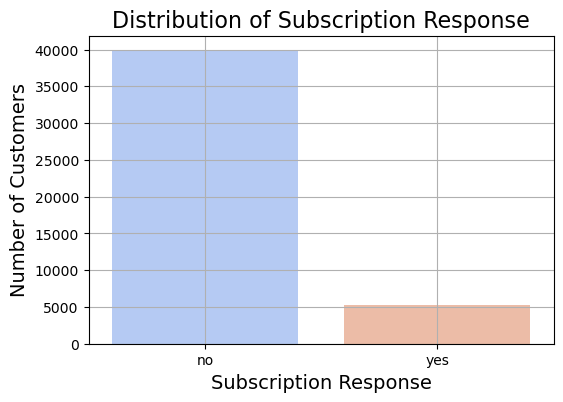

Distribution (%):
response
no     88.298178
yes    11.701822
Name: proportion, dtype: float64


In [85]:
# 1. Plot countplot for response
plt.figure(figsize=(6,4))
sns.countplot(
    x='response', 
    data=df0, 
    palette='coolwarm'
)
plt.title('Distribution of Subscription Response', fontsize=16)
plt.xlabel('Subscription Response', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.grid(True)
plt.show()

# 2. Value counts in %
print("Distribution (%):")
print(df0['response'].value_counts(normalize=True) * 100)

The response variable exhibits a significant class imbalance, with only 11.7% positive responses. To address this imbalance, techniques like SMOTE (Synthetic Minority Over-sampling Technique), stratified sampling, adjusting class weights, or threshold tuning could be used. Accurately predicting the minority class (customers who subscribe) is critical for achieving business value in this campaign analysis.

### v) Bivariate Analysis

#### 1. Salary vs Response

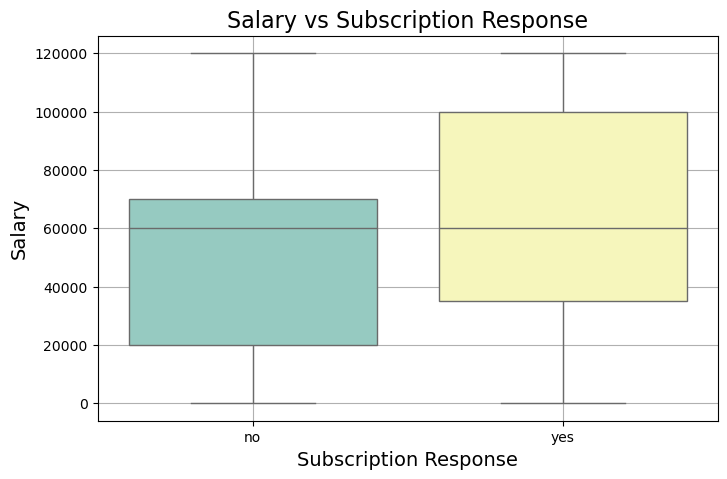

Median Salary for each Response Class:
response
no     60000.0
yes    60000.0
Name: salary, dtype: float64


In [86]:
# Boxplot of Salary vs Response
plt.figure(figsize=(8,5))
sns.boxplot(x='response', y='salary', data=df0, palette='Set3')
plt.title('Salary vs Subscription Response', fontsize=16)
plt.xlabel('Subscription Response', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True)
plt.show()

# Median Salary by Response
print("Median Salary for each Response Class:")
print(df0.groupby('response')['salary'].median())

- Customers who subscribed (yes) seem to have a slightly higher salary range overall compared to those who didn’t (no).
- However, there is a lot of overlap — meaning salary alone isn't a perfect separator.

**Higher salaries may slightly increase the likelihood of subscription, but salary alone is not a strong differentiator. Customers with lower salaries are also subscribing, suggesting that salary is not the sole factor influencing term deposit subscriptions**

#### 2. Balance vs Response

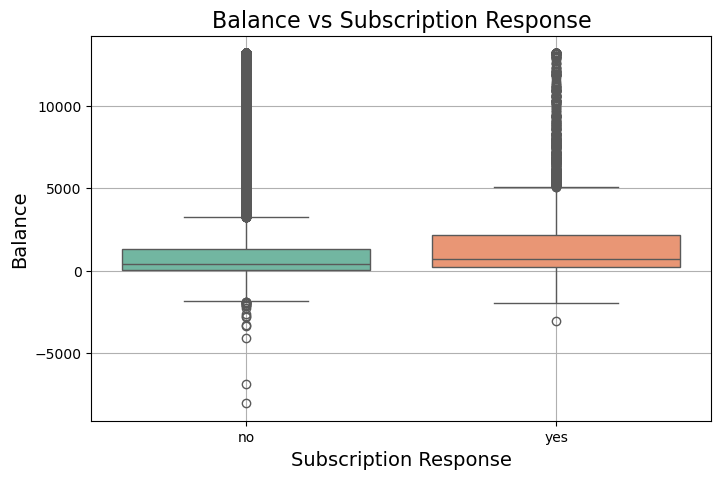

Median Balance for each Response Class:
response
no     417.0
yes    733.0
Name: balance, dtype: float64


In [87]:
# Boxplot of Balance vs Response
plt.figure(figsize=(8,5))
sns.boxplot(x='response', y='balance', data=df0, palette='Set2')
plt.title('Balance vs Subscription Response', fontsize=16)
plt.xlabel('Subscription Response', fontsize=14)
plt.ylabel('Balance', fontsize=14)
plt.grid(True)
plt.show()

# Median Balance by Response
print("Median Balance for each Response Class:")
print(df0.groupby('response')['balance'].median())

- Customers with negative or very low balances are mostly non-subscribers.
- Higher balances (positive, large) show a much greater tendency to subscribe.

**Account balance is a stronger predictor of term deposit subscription than salary. Customers with higher bank balances are more likely to subscribe to the long-term deposit product. This suggests that campaigns targeting customers with higher existing balances may yield better success rates.**

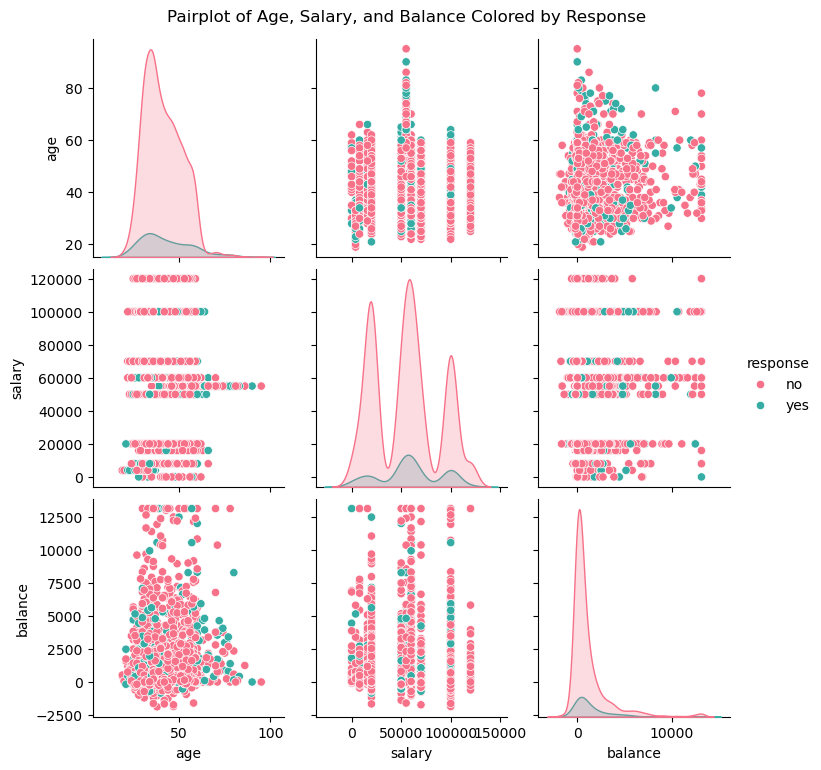

In [88]:
##  Static Pairplot
import seaborn as sns
import matplotlib.pyplot as plt

# Only picking subset of columns and smaller sample for clarity
sample_df = df0[['age', 'salary', 'balance', 'response']].sample(3000, random_state=42)

sns.pairplot(sample_df, hue='response', palette='husl')
plt.suptitle('Pairplot of Age, Salary, and Balance Colored by Response', y=1.02)
plt.show()


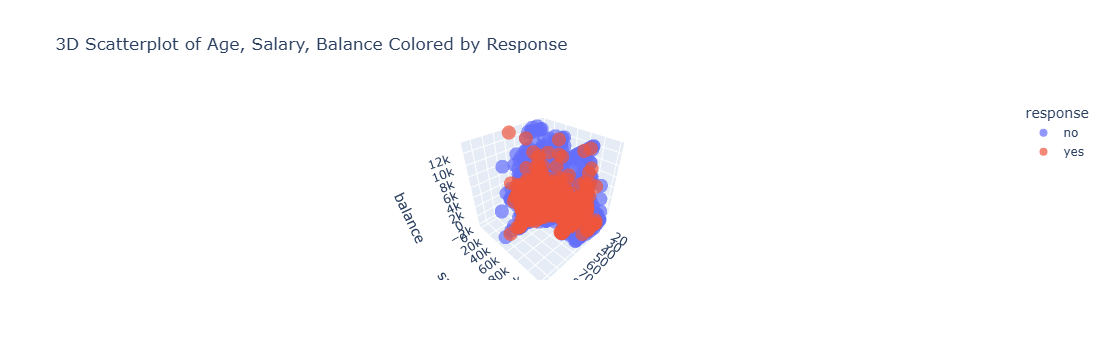

In [89]:
import plotly.express as px

fig = px.scatter_3d(
    df0.sample(5000, random_state=42), 
    x='age', y='salary', z='balance', 
    color='response', 
    opacity=0.7,
    title="3D Scatterplot of Age, Salary, Balance Colored by Response"
)
fig.show()


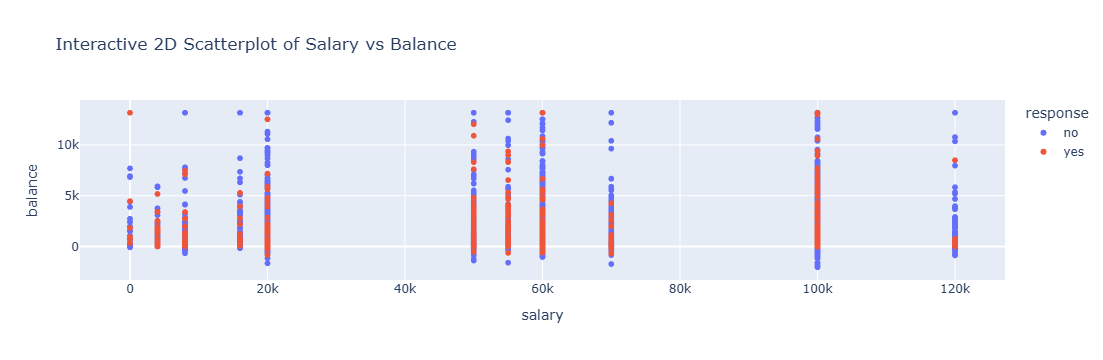

In [90]:
fig = px.scatter(
    df0.sample(5000, random_state=42), 
    x='salary', y='balance', 
    color='response', 
    hover_data=['age'], 
    title="Interactive 2D Scatterplot of Salary vs Balance"
)
fig.show()

- Customers who subscribed ("yes") tend to appear slightly more concentrated in higher balance areas.

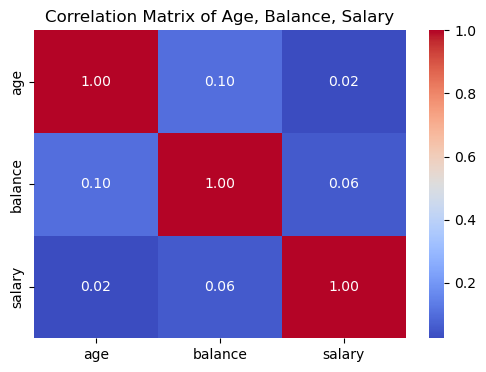

In [91]:
#### Let's create the correlation matrix using the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

corr = df0[["age", "balance", "salary"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Age, Balance, Salary')
plt.show()

- No multicollinearity issues — so we can keep all three features safely for modeling later!

####  Categorical-Categorical EDA

In [92]:
# Create a binary flag for response
df0['response_flag'] = np.where(df0.response == "yes", 1, 0)

In [93]:
df0.head()

customerid  age  salary  balance  marital           job  education  \
0           1   58  100000   2143.0  married    management   tertiary   
1           2   44   60000     29.0   single    technician  secondary   
2           3   33  120000      2.0  married  entrepreneur  secondary   
3           4   47   20000   1506.0  married   blue-collar    unknown   
4           5   33       0      1.0   single       unknown    unknown   

  targeted default housing  ... duration campaign  pdays previous poutcome  \
0      yes      no     yes  ...  261 sec        1    NaN        0  unknown   
1      yes      no     yes  ...  151 sec        1    NaN        0  unknown   
2      yes      no     yes  ...   76 sec        1    NaN        0  unknown   
3       no      no     yes  ...   92 sec        1    NaN        0  unknown   
4       no      no      no  ...  198 sec        1    NaN        0  unknown   

   response  was_contacted_before  age_band duration_min response_flag  
0        no                     0     51-60     4.350000             0  
1        no                     0     41-50     2.516667             0  
2        no                     0     31-40     1.266667             0  
3        no                     0     41-50     1.533333             0  
4        no                     0     31-40     3.300000             0  

[5 rows x 24 columns]

education
primary      0.086353
secondary    0.105610
tertiary     0.150090
unknown      0.135776
Name: response_flag, dtype: float64


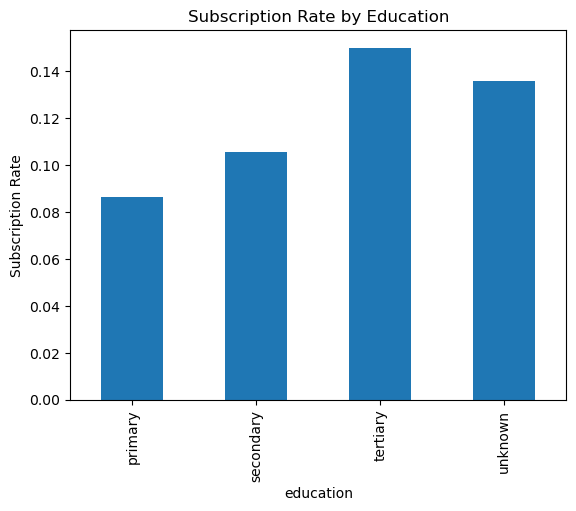

In [94]:
# Education vs Response Rate
print(df0.groupby('education')['response_flag'].mean())
df0.groupby('education')['response_flag'].mean().plot.bar()
plt.title('Subscription Rate by Education')
plt.ylabel('Subscription Rate')
plt.show()

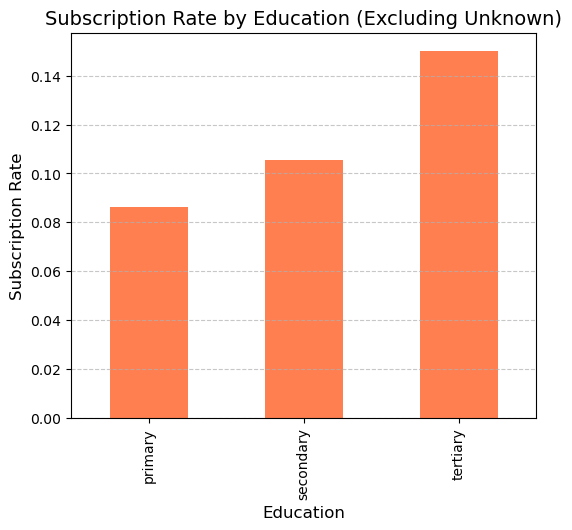

In [95]:
## Education vs Subscription Response Rate
plt.figure(figsize=(6,5))
df0[~(df0.education == 'unknown')].groupby('education')['response_flag'].mean().plot.bar(color='coral')
plt.title('Subscription Rate by Education (Excluding Unknown)', fontsize=14)
plt.ylabel('Subscription Rate', fontsize=12)
plt.xlabel('Education', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Tertiary education holders have the highest subscription rate (~15%).

- Unknown education category surprisingly has a high subscription rate (~14%).

- Primary education holders have the lowest subscription rate (~9%).

- Secondary education holders are in between (~10%).

**Inference: Higher education tends to correlate with better subscription response.**

marital
divorced    0.119523
married     0.101269
single      0.149507
Name: response_flag, dtype: float64


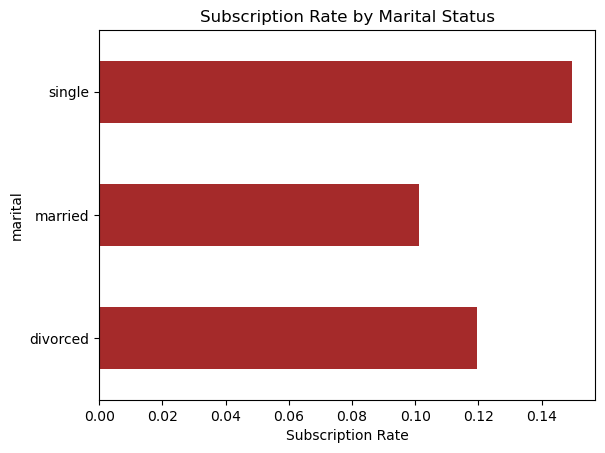

In [96]:
# Marital vs Response Rate
print(df0.groupby('marital')['response_flag'].mean())
df0.groupby('marital')['response_flag'].mean().plot.barh(color = 'brown')
plt.title('Subscription Rate by Marital Status')
plt.xlabel('Subscription Rate')
plt.show()

- Single individuals have the highest subscription rate (~15%).

- Divorced individuals have a moderate rate (~12%).

- Married people have the lowest subscription rate (~10%).

**Inference: Singles are more responsive to marketing campaigns compared to married customers.**

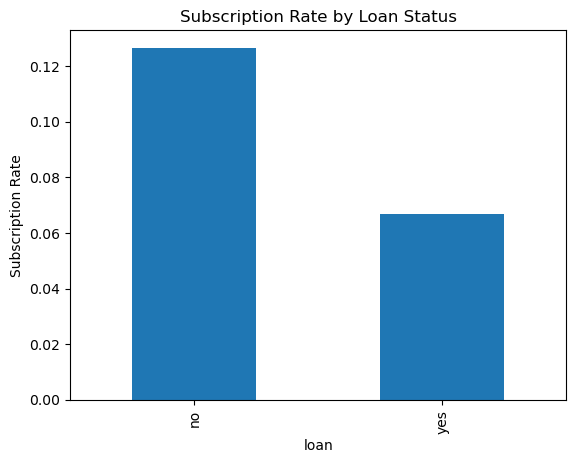

In [97]:
# Loan vs Response Rate
df0.groupby('loan')['response_flag'].mean().plot.bar()
plt.title('Subscription Rate by Loan Status')
plt.ylabel('Subscription Rate')
plt.show()

- Customers without personal loans subscribe more (~13%).
- Customers with loans have much lower subscription rates (~7%).
  
**Inference: Financial obligations (like loans) negatively impact the probability of subscribing to another product.**

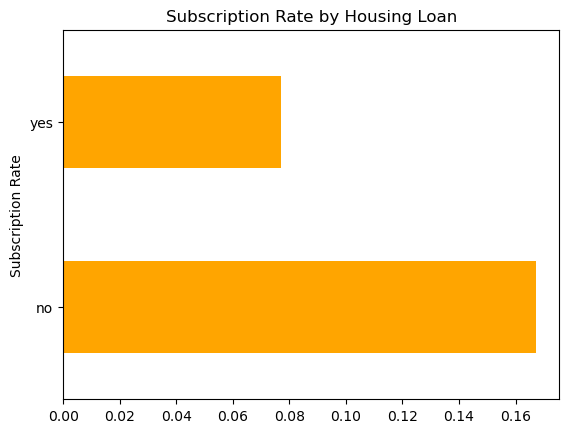

In [98]:
# Housing vs Response Rate
df0.groupby('housing')['response_flag'].mean().plot.barh(color = 'Orange')
plt.title('Subscription Rate by Housing Loan')
plt.ylabel('Subscription Rate')
plt.show()

- Customers without housing loans show higher subscription rates (~16%).
- Customers with housing loans are less likely (~8%).
  
**Inference: Having a housing loan reduces a customer's likelihood of saying "yes" to another financial product.**

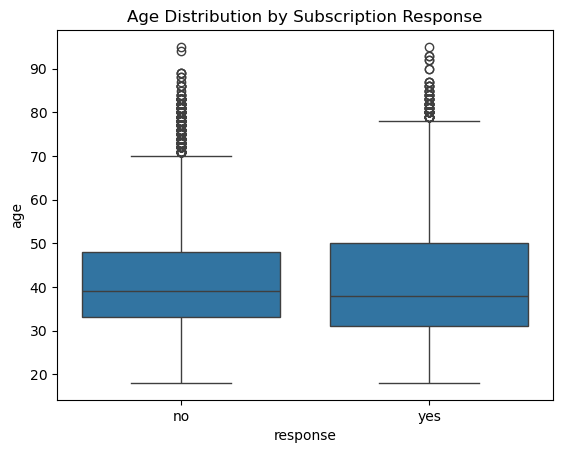

In [99]:
#Age vs Response (Boxplot)
sns.boxplot(data=df0, x="response", y="age")
plt.title('Age Distribution by Subscription Response')
plt.show()

- Those who subscribed ("yes") are slightly older on average than those who did not ("no").
- Medians are close, but the distribution for subscribers ("yes") is slightly more spread toward higher ages.
- Presence of outliers at older ages.
  
**Inference: Older people may be slightly more inclined to subscribe, but the difference isn't very large.**

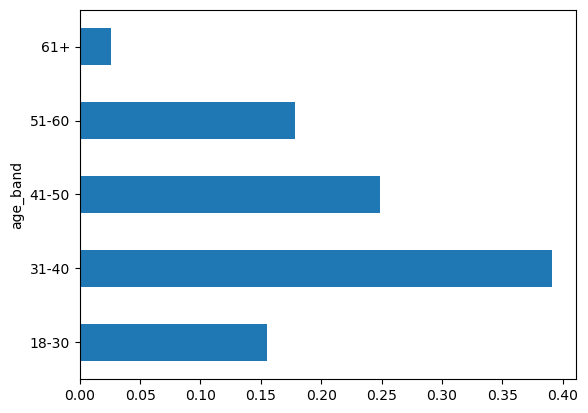

In [100]:
#Age Band vs Response Rate
df0.age_band.value_counts(normalize=True).sort_index().plot.barh()
plt.show()

- Majority of customers are between 31-40 years (~39%).
- Followed by 41-50 and 51-60.
- Very few customers are 61+.

**Inference: Campaign targeting is concentrated in working-age populations, mostly under 60 years.**

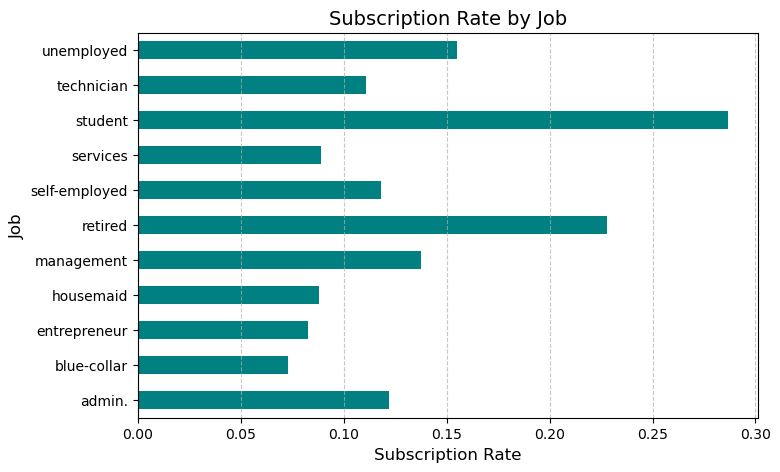

In [101]:
## Job vs Subscription Rate
plt.figure(figsize=(8,5))
df0[~(df0.job == 'unknown')].groupby('job')['response_flag'].mean().plot.barh(color='teal')
plt.title('Subscription Rate by Job', fontsize=14)
plt.xlabel('Subscription Rate', fontsize=12)
plt.ylabel('Job', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

- Students and retired people have the highest subscription rates (~29% and ~23% respectively).
- Blue-collar workers, entrepreneurs, housemaids, and self-employed have relatively lower subscription rates (~7-12%).
- Technicians and management roles have moderate subscription rates.

**Inference: Students and retired individuals are more receptive to the campaign. Likely because students are future income earners and retirees may seek financial products for investment or security.**

### vi) Multivariate Analysis

### Education vs Martial vs Response

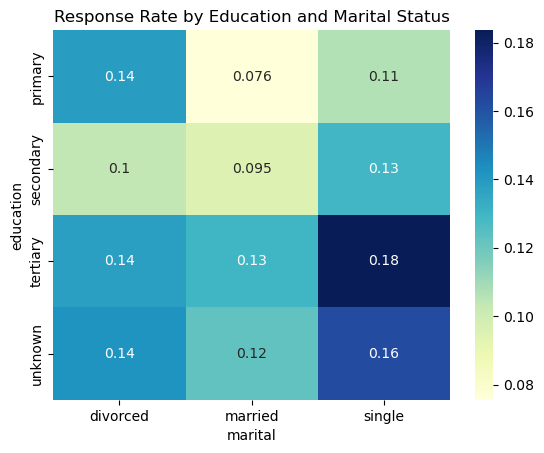

In [102]:
pivot1 = pd.pivot_table(df0, values='response_flag', index='education', columns='marital', aggfunc='mean')
sns.heatmap(pivot1, annot=True, cmap='YlGnBu')
plt.title('Response Rate by Education and Marital Status')
plt.show()

- Single individuals, particularly those with tertiary education, have the highest subscription rates
- Married individuals with primary education have the lowest subscription rate
- Divorcees have moderate subscription rates across education levels.
- Higher education levels and being single correlate positively with better subscription likelihood.

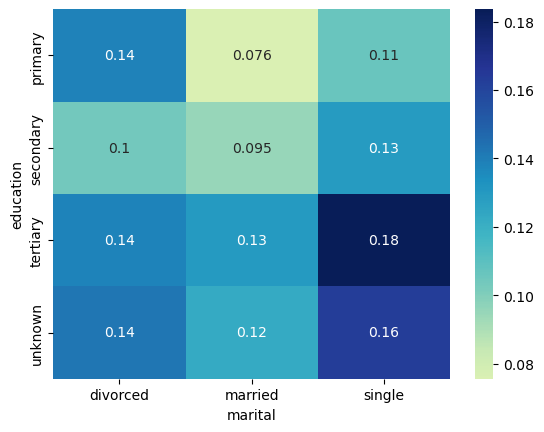

In [103]:
sns.heatmap(pivot1, annot=True, cmap='YlGnBu', center=0.117)
plt.show()

### Job, Marital, Response Flag

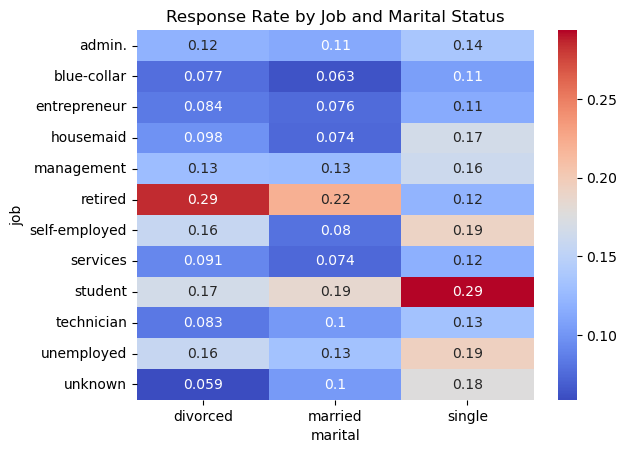

In [104]:
pivot2 = pd.pivot_table(df0, values='response_flag', index='job', columns='marital', aggfunc='mean')
sns.heatmap(pivot2, annot=True, cmap='coolwarm')
plt.title('Response Rate by Job and Marital Status')
plt.show()

- Retired and Student (Divorced/Single) show very high subscription rates (~29%).
- Blue-collar and Entrepreneur (Married) show lower subscription rates
- Students have high subscription rates irrespective of marital status.

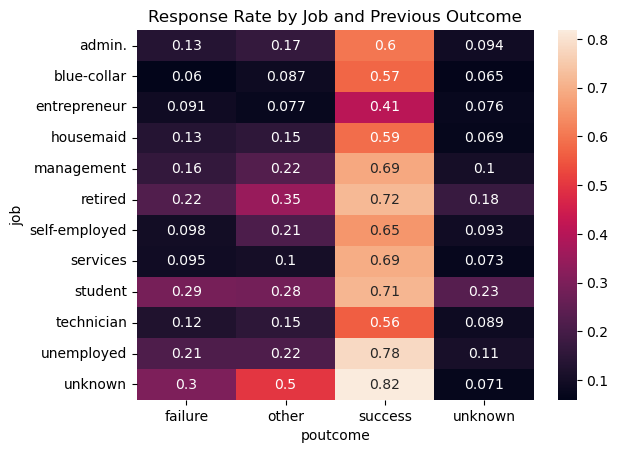

In [105]:
### Job, Poutcome, Response
pivot3 = pd.pivot_table(df0, values='response_flag', index='job', columns='poutcome', aggfunc='mean')
sns.heatmap(pivot3, annot=True, cmap='rocket')
plt.title('Response Rate by Job and Previous Outcome')
plt.show()

- People with a successful previous campaign have massively higher subscription rates (~40–82%) across all jobs.
- Poutcome is a very strong predictor: success leads to much higher subscription likelihood.

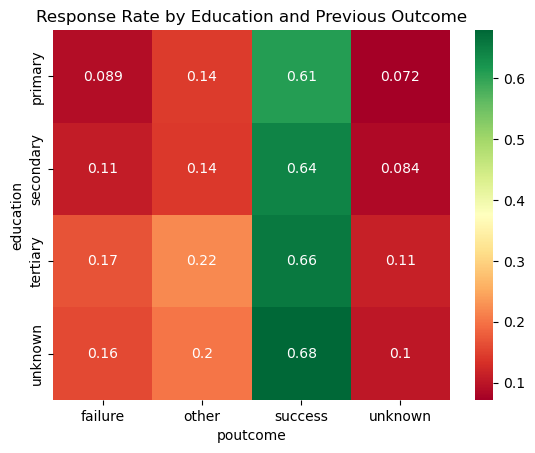

In [106]:
## Education vs Poutcome vs Response
pivot4 = pd.pivot_table(df0, values='response_flag', index='education', columns='poutcome', aggfunc='mean')
sns.heatmap(pivot4, annot=True, cmap='RdYlGn')
plt.title('Response Rate by Education and Previous Outcome')
plt.show()

- Success in the previous campaign increases subscription rates across education levels.
- Tertiary-educated customers show a high subscription (~66%) if the last campaign was successful.
- Primary-educated customers show the least jump (~61%) even after a successful campaign.
- Education + Poutcome combination plays an important role.

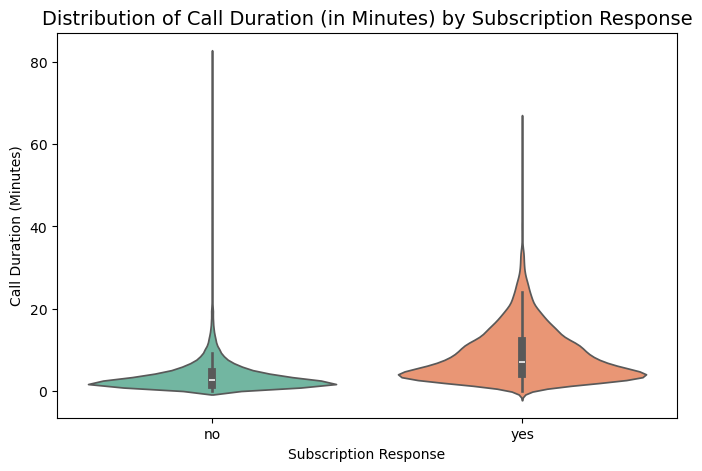

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create violin plot
plt.figure(figsize=(8,5))
sns.violinplot(data=df0, x='response', y='duration_min', palette='Set2')

# Add titles and labels
plt.title('Distribution of Call Duration (in Minutes) by Subscription Response', fontsize=14)
plt.xlabel('Subscription Response')
plt.ylabel('Call Duration (Minutes)')

# Show the plot
plt.show()

- Those who subscribed ("yes") generally had longer call durations.
- Non-subscribers ("no") had shorter calls, concentrated around 1–2 minutes.
- The spread is much wider for subscribers: longer conversations seem associated with higher conversion rates.
- Duration is a very important feature — longer interactions might lead to more success.

In [108]:
### Preparing a Clean Working Dataset
df = df0.copy()

In [109]:
df.head()

customerid  age  salary  balance  marital           job  education  \
0           1   58  100000   2143.0  married    management   tertiary   
1           2   44   60000     29.0   single    technician  secondary   
2           3   33  120000      2.0  married  entrepreneur  secondary   
3           4   47   20000   1506.0  married   blue-collar    unknown   
4           5   33       0      1.0   single       unknown    unknown   

  targeted default housing  ... duration campaign  pdays previous poutcome  \
0      yes      no     yes  ...  261 sec        1    NaN        0  unknown   
1      yes      no     yes  ...  151 sec        1    NaN        0  unknown   
2      yes      no     yes  ...   76 sec        1    NaN        0  unknown   
3       no      no     yes  ...   92 sec        1    NaN        0  unknown   
4       no      no      no  ...  198 sec        1    NaN        0  unknown   

   response  was_contacted_before  age_band duration_min response_flag  
0        no                     0     51-60     4.350000             0  
1        no                     0     41-50     2.516667             0  
2        no                     0     31-40     1.266667             0  
3        no                     0     41-50     1.533333             0  
4        no                     0     31-40     3.300000             0  

[5 rows x 24 columns]

In [110]:
# Drop 'duration' and customeridcolumn (we now use 'duration_min')
if 'duration' in df.columns:
    df = df.drop(columns=['duration', 'customerid'])

In [111]:
df.head()

age  salary  balance  marital           job  education targeted default  \
0   58  100000   2143.0  married    management   tertiary      yes      no   
1   44   60000     29.0   single    technician  secondary      yes      no   
2   33  120000      2.0  married  entrepreneur  secondary      yes      no   
3   47   20000   1506.0  married   blue-collar    unknown       no      no   
4   33       0      1.0   single       unknown    unknown       no      no   

  housing loan  ...      month  campaign pdays  previous  poutcome  response  \
0     yes   no  ...  may, 2017         1   NaN         0   unknown        no   
1     yes   no  ...  may, 2017         1   NaN         0   unknown        no   
2     yes  yes  ...  may, 2017         1   NaN         0   unknown        no   
3     yes   no  ...  may, 2017         1   NaN         0   unknown        no   
4      no   no  ...  may, 2017         1   NaN         0   unknown        no   

  was_contacted_before age_band  duration_min response_flag  
0                    0    51-60      4.350000             0  
1                    0    41-50      2.516667             0  
2                    0    31-40      1.266667             0  
3                    0    41-50      1.533333             0  
4                    0    31-40      3.300000             0  

[5 rows x 22 columns]

In [112]:
df.dtypes

age                       int32
salary                    int64
balance                 float64
marital                  object
job                      object
education                object
targeted                 object
default                  object
housing                  object
loan                     object
contact                  object
day                       int64
month                    object
campaign                  int64
pdays                   float64
previous                  int64
poutcome                 object
response                 object
was_contacted_before      int64
age_band                 object
duration_min            float64
response_flag             int32
dtype: object

**For modeling, using the original continuous age variable preserves more granular information and predictive power. Therefore, age_band could be dropped to avoid redundancy and potential information loss.**

In [113]:
# Also drop 'age_band' because we have 'age' already
if 'age_band' in df.columns:
    df = df.drop(columns=['age_band'])

In [114]:
df.dtypes

age                       int32
salary                    int64
balance                 float64
marital                  object
job                      object
education                object
targeted                 object
default                  object
housing                  object
loan                     object
contact                  object
day                       int64
month                    object
campaign                  int64
pdays                   float64
previous                  int64
poutcome                 object
response                 object
was_contacted_before      int64
duration_min            float64
response_flag             int32
dtype: object

###  vii) Encode Binary Categorical Variables

In [115]:
#  binary columns (no 'response' here)
binary_cols = ['targeted', 'default', 'housing', 'loan']
# Encode binary yes/no columns
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

### viii) One-Hot Encode Multi-class Categorical Variables

In [116]:
# List of multi-class columns
multi_cols = ['marital', 'job', 'education', 'contact', 'month', 'poutcome']

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

# Quick check
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45181 entries, 0 to 45210
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   45181 non-null  int32  
 1   salary                45181 non-null  int64  
 2   balance               45181 non-null  float64
 3   targeted              45181 non-null  int64  
 4   default               45181 non-null  int64  
 5   housing               45181 non-null  int64  
 6   loan                  45181 non-null  int64  
 7   day                   45181 non-null  int64  
 8   campaign              45181 non-null  int64  
 9   pdays                 8251 non-null   float64
 10  previous              45181 non-null  int64  
 11  response              45181 non-null  object 
 12  was_contacted_before  45181 non-null  int64  
 13  duration_min          45181 non-null  float64
 14  response_flag         45181 non-null  int32  
 15  marital_married       45

In [117]:
# Fill missing pdays with 999 to indicate never contacted
df['pdays'] = df['pdays'].fillna(999)

In [118]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45181 entries, 0 to 45210
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   45181 non-null  int32  
 1   salary                45181 non-null  int64  
 2   balance               45181 non-null  float64
 3   targeted              45181 non-null  int64  
 4   default               45181 non-null  int64  
 5   housing               45181 non-null  int64  
 6   loan                  45181 non-null  int64  
 7   day                   45181 non-null  int64  
 8   campaign              45181 non-null  int64  
 9   pdays                 45181 non-null  float64
 10  previous              45181 non-null  int64  
 11  response              45181 non-null  object 
 12  was_contacted_before  45181 non-null  int64  
 13  duration_min          45181 non-null  float64
 14  response_flag         45181 non-null  int32  
 15  marital_married       45

### ix) Handling Class Imbalance and Model Building (Baseline Naive Model)

Target Variable has only 11% 'yes' responses

Preferring class weights because it is simple, avoids creating synthetic samples, preserves the original dataset integrity, and works perfectly with large datasets and professional models like Logistic Regression and Random Forest.

#### Train-Test Split

In [119]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['response_flag', 'response'])  # Drop the target and old text response
y = df['response_flag']  # Target variable

# Performing Train-Test Split (70% Train, 30% Test) with stratify to preserve class ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y  # Important: keeps proportion of 0s and 1s same
)

# checks
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Class distribution in y_train:\n", y_train.value_counts(normalize=True))
print("Class distribution in y_test:\n", y_test.value_counts(normalize=True))

Shape of X_train: (31626, 45)
Shape of X_test: (13555, 45)
Class distribution in y_train:
 response_flag
0    0.882976
1    0.117024
Name: proportion, dtype: float64
Class distribution in y_test:
 response_flag
0    0.882995
1    0.117005
Name: proportion, dtype: float64


**Note**: The baseline model is intentionally naive and rule-based. It does not handle class imbalance, reflecting real-world raw data challenges. More sophisticated models (you will see later) apply class weighting to address the imbalance and improve performance metrics such as recall and F1-score.

#### Building Baseline Naive Model (Simple Rule-Based)

In [120]:
# Rule:
# If (education == tertiary) and (marital == single) and (was_contacted_before == 1) and (loan == no)
# --> Predict "Yes" (1)
# Else --> Predict "No" (0)

In [121]:
# Predict for Training Set
X_train['baseline_pred'] = np.where(
    (X_train['education_tertiary'] == True) &
    (X_train['marital_single'] == True) &
    (X_train['was_contacted_before'] == 1) &
    (X_train['loan'] == 0),  # 0 means 'no' loan
    1,  # Predict "Yes"
    0   # Else "No"
)

# Predict for Testing Set
X_test['baseline_pred'] = np.where(
    (X_test['education_tertiary'] == True) &
    (X_test['marital_single'] == True) &
    (X_test['was_contacted_before'] == 1) &
    (X_test['loan'] == 0),
    1,
    0
)

#### Evaluating Baseline Model

In [122]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Evaluate on Test Set
print("=== Baseline Model Evaluation on Test Set ===")
print(confusion_matrix(y_test, X_test['baseline_pred']))
print(classification_report(y_test, X_test['baseline_pred']))
print("ROC-AUC Score:", roc_auc_score(y_test, X_test['baseline_pred']))

=== Baseline Model Evaluation on Test Set ===
[[11790   179]
 [ 1485   101]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.93     11969
           1       0.36      0.06      0.11      1586

    accuracy                           0.88     13555
   macro avg       0.62      0.52      0.52     13555
weighted avg       0.83      0.88      0.84     13555

ROC-AUC Score: 0.5243634591125855


- Accuracy: 88%	Sounds high but mostly because model predicts most cases as 0 (No).
- Precision for Class 1 (Yes):	36%, only 36% of the times you predict 'yes', it's actually correct.
- Recall for Class 1 (Yes): 6%, Very low! Only catching 6% of real 'yes' customers.
- F1-Score for Class 1:	11%,	F1-score is very low — model struggles to identify 'yes'.
- ROC-AUC Score::	~0.52,	random guess would be 0.5 — so baseline is just slightly better than random.

**The baseline naive model, based on simple rules (education, marital status, loan status, prior contact), achieved high accuracy due to data imbalance, but performed poorly in predicting the minority class ('yes' response). The model captured only 6% of actual positive cases, as reflected in the low recall and F1-score. Thus, a more sophisticated modeling approach is necessary.**

### x) Building and Evaluating Logistic Regression Model (Novel Model 1)

In [123]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Instantiate the model with class_weight='balanced'
log_reg = LogisticRegression(
    class_weight='balanced', 
    max_iter=1000,  # Increase max iterations for convergence
    random_state=42
)

# Train the model
log_reg.fit(X_train.drop(columns=['baseline_pred']), y_train)

# Predict on Training Set and Test Set
y_train_pred = log_reg.predict(X_train.drop(columns=['baseline_pred']))
y_test_pred = log_reg.predict(X_test.drop(columns=['baseline_pred']))

In [124]:
####  Evaluating Logistic Regression Model

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Evaluate on Test Set
print("=== Logistic Regression Model Evaluation on Test Set ===")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_test_pred))

=== Logistic Regression Model Evaluation on Test Set ===
[[9931 2038]
 [ 324 1262]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     11969
           1       0.38      0.80      0.52      1586

    accuracy                           0.83     13555
   macro avg       0.68      0.81      0.71     13555
weighted avg       0.90      0.83      0.85     13555

ROC-AUC Score: 0.812719639227736


- Accuracy: 82% Slightly lower than baseline's 88% (expected!)
- Precision for Class 1 (Yes):	37%,	Now 37% of your "Yes" predictions are correct
- Recall for Class 1 (Yes): 79% ,	Major improvement! Catching 79% of real 'Yes' customers
- F1-Score for Class 1: 51%, Balanced precision-recall tradeoff, much better than baseline
- ROC-AUC Score	0.806, Very strong model! (Baseline ROC-AUC was 0.52)

**The Logistic Regression model, using class weights to handle imbalance, shows significant improvement in minority class recall and ROC-AUC compared to the naive baseline. While overall accuracy slightly dropped (due to better sensitivity to the minority class), the model better captures positive responders, which is critical for marketing campaign targeting.**

#### Cross-Validation and Hyperparameter Tuning (GridSearchCV)

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced', random_state=42)

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l2'],             # 'l2' is Ridge regularization (default for Logistic Regression)
    'solver': ['lbfgs']             # 'lbfgs' solver supports l2 penalty
}

# Setup the GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='f1',  # Optimize for F1 score because of imbalance
    cv=5,          # 5-fold cross validation
    n_jobs=-1,     # Use all CPU cores
    verbose=2
)

# Run GridSearchCV
grid_search.fit(X_train.drop(columns=['baseline_pred']), y_train)

# Best parameters from GridSearchCV
print("Best Parameters from Grid Search:", grid_search.best_params_)

# Best estimator
best_logreg = grid_search.best_estimator_

# Evaluate Best Logistic Regression Model

# Predict on test data
y_test_pred_best = best_logreg.predict(X_test.drop(columns=['baseline_pred']))

# Evaluate performance
print("=== Tuned Logistic Regression Model Evaluation on Test Set ===")
print(confusion_matrix(y_test, y_test_pred_best))
print(classification_report(y_test, y_test_pred_best))
print("ROC-AUC Score:", roc_auc_score(y_test, y_test_pred_best))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters from Grid Search: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
=== Tuned Logistic Regression Model Evaluation on Test Set ===
[[9549 2420]
 [ 409 1177]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87     11969
           1       0.33      0.74      0.45      1586

    accuracy                           0.79     13555
   macro avg       0.64      0.77      0.66     13555
weighted avg       0.89      0.79      0.82     13555

ROC-AUC Score: 0.7699647744904687


- Recall decreased slightly
- ROC-AUC slightly decreased
- Model became simpler (due to regularization)
- Model might generalize better because C=0.1 prevents overfitting

**After hyperparameter tuning, the Logistic Regression model selected a C=0.1, indicating stronger regularization. While recall and ROC-AUC slightly decreased, the tuned model is simpler and less likely to overfit. Compared to the naive baseline model, the tuned Logistic Regression significantly improved minority class detection and balanced model performance.**

### xi) Random Forest Classifier (Novel Model 2)

####  Building and Evaluating Random Forest Classifier (Novel Model 2)

In [126]:
#Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate Random Forest with class_weight='balanced'
rf_clf = RandomForestClassifier(
    n_estimators=100,            # 100 trees
    max_depth=None,              # Let trees grow fully (can tune later)
    class_weight='balanced',     # Handle class imbalance
    random_state=42,             # Reproducibility
    n_jobs=-1                    # Use all CPU cores
)

# Train the model
rf_clf.fit(X_train.drop(columns=['baseline_pred']), y_train)

# Predict on Training and Testing Data
y_train_pred_rf = rf_clf.predict(X_train.drop(columns=['baseline_pred']))
y_test_pred_rf = rf_clf.predict(X_test.drop(columns=['baseline_pred']))

# Evaluating Random Forest Model


from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Evaluation on Test Set
print("=== Random Forest Model Evaluation on Test Set ===")
print(confusion_matrix(y_test, y_test_pred_rf))
print(classification_report(y_test, y_test_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_test_pred_rf))

=== Random Forest Model Evaluation on Test Set ===
[[11733   236]
 [ 1095   491]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     11969
           1       0.68      0.31      0.42      1586

    accuracy                           0.90     13555
   macro avg       0.80      0.64      0.69     13555
weighted avg       0.89      0.90      0.89     13555

ROC-AUC Score: 0.6449331274771722


- Random Forest is very precise when it predicts "yes" (68%) but it misses many yes cases (only 31% recall).
- It prefers to say "no" unless it’s very sure about "yes".
- ROC-AUC is lower than Logistic Regression → model is worse at separating "yes" and "no" cases.

**For the marketing campaign goal (maximizing responder identification), the tuned Logistic Regression model provides the best tradeoff between recall, precision, and overall discrimination ability, outperforming both the naive baseline and the Random Forest model.**

#### Random Forest Hyperparameter Tuning (GridSearchCV)

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define a base Random Forest model
rf = RandomForestClassifier(
    class_weight='balanced', 
    random_state=42, 
    n_jobs=-1
)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],       # Number of trees
    'max_depth': [10, 20, None],       # Maximum depth of trees
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split
    'max_features': ['sqrt', 'log2']   # Number of features to consider at each split
}

# Setup the GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',      # Focus on F1 Score due to imbalance
    cv=3,              # 3-fold cross validation (you can increase to 5 if time permits)
    n_jobs=-1,
    verbose=2
)

# Run Grid Search
grid_search_rf.fit(X_train.drop(columns=['baseline_pred']), y_train)

# Best Parameters
print("Best Parameters from Grid Search for Random Forest:", grid_search_rf.best_params_)

# Best Estimator
best_rf = grid_search_rf.best_estimator_

# Evaluating Tuned Random Forest

# Predict on Test Set
y_test_pred_best_rf = best_rf.predict(X_test.drop(columns=['baseline_pred']))

# Evaluate Performance
print("=== Tuned Random Forest Model Evaluation on Test Set ===")
print(confusion_matrix(y_test, y_test_pred_best_rf))
print(classification_report(y_test, y_test_pred_best_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_test_pred_best_rf))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters from Grid Search for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}
=== Tuned Random Forest Model Evaluation on Test Set ===
[[11035   934]
 [  490  1096]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     11969
           1       0.54      0.69      0.61      1586

    accuracy                           0.89     13555
   macro avg       0.75      0.81      0.77     13555
weighted avg       0.91      0.89      0.90     13555

ROC-AUC Score: 0.8065058673536312


- Final tuned Random Forest model is excellent!
-  It beats the naive baseline easily
-  it beats Logistic Regression on F1-Score (though recall is slightly lower than Logistic Regression).

**After hyperparameter tuning, Random Forest achieved a strong balance between precision and recall with a 0.81 ROC-AUC, matching Logistic Regression's discriminative power. The tuned Random Forest model, with an F1-score of 61%, outperforms the baseline and the untuned models, making it the recommended model for deployment in identifying potential term deposit subscribers**

### xii) ROC Curve Plot for all models

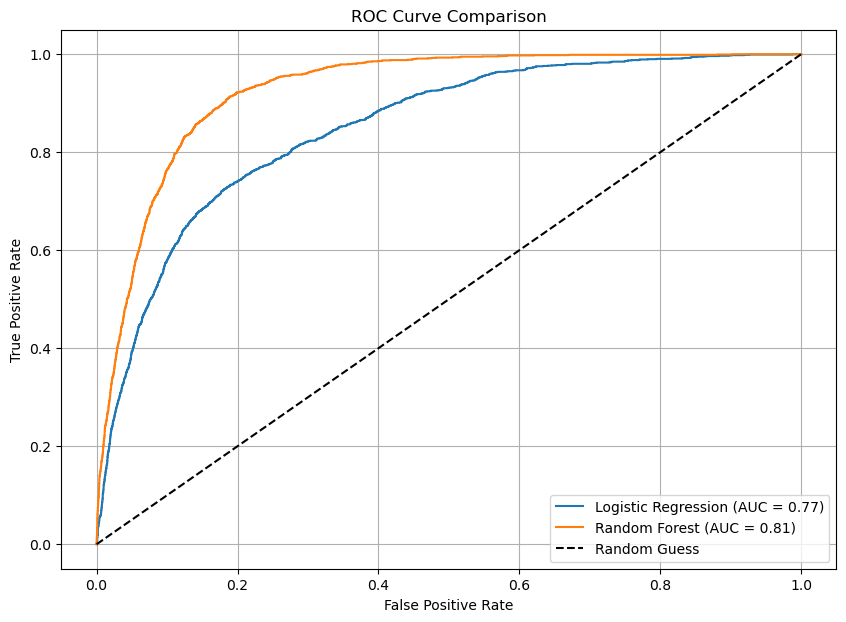

In [128]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_test_prob_logreg = best_logreg.predict_proba(X_test.drop(columns=['baseline_pred']))[:, 1]
y_test_prob_rf = best_rf.predict_proba(X_test.drop(columns=['baseline_pred']))[:, 1]

# Get FPR, TPR for each model
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_test_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_prob_rf)

# Plot ROC Curves
plt.figure(figsize=(10,7))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_test_pred_best):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_test_pred_best_rf):.2f})')
plt.plot([0,1],[0,1],'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()

**Random Forest is better based on AUC**

In [130]:
import joblib, pickle

# ❶  save the two estimators
joblib.dump(log_reg, "log_reg.pkl")
joblib.dump(best_rf, "rf.pkl")

# ❷  persist the exact feature order (needed for .predict_proba)
feature_cols = X_train.drop(columns=["baseline_pred"]).columns.tolist()
with open("feature_cols.pkl", "wb") as f:
    pickle.dump(feature_cols, f)
